# Forex News Analysis

![pic](forexpic.jpeg)

# Project Overview 

This project is a fusion of machine learning and time series forecasting techniques aimed at predicting the sentiment (positive or negative) of Forex news articles. By combining traditional machine learning models and the Facebook Prophet time series forecasting model, the project provides insights into how news impacts the foreign exchange market.

# Business Understanding

Predicting the influence of Forex news articles is vital for traders and investors looking to forecast market movements driven by economic events. The project addresses this challenge by developing two predictive models—one centered on machine learning and another leveraging time series forecasting. These models offer actionable insights to guide trading strategies.

### Columns Overview:

- `Date`: Date of the news article
- `ISM Manufacturing PMI`: Institute for Supply Management Manufacturing Purchasing Managers Index
- `ISM Services PMI`: Institute for Supply Management Non-Manufacturing Purchasing Managers Index
- `Housing Starts`: Number of housing construction projects started
- `Non-Farm Employment Change`: Change in the number of employed people
- `Unemployment Rate`: Percentage of unemployed individuals in the labor force
- `Consumer Price Index (CPI)`: Measure of inflation
- `Producer Price Index (PPI)`: Measure of average change in selling prices
- `Retail Sales`: Total retail sales of consumer goods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns

In [2]:
# read CSV file into dataframe
df = pd.read_csv('Forex Fundumental News For USD.csv')
df

Date  ISM Manufacturing PMI  ISM Services PMI Housing Starts  \
0    Feb-10                   58.4              50.5          0.59M   
1    Mar-10                   56.5              53.0          0.58M   
2    Apr-10                   59.6              55.4          0.63M   
3    May-10                   60.4              55.4          0.67M   
4    Jun-10                   59.7              55.4          0.59M   
..      ...                    ...               ...            ...   
156  Feb-23                   47.4              55.2          1.31M   
157  Mar-23                   47.7              55.1          1.45M   
158  Apr-23                   46.3              51.2          1.42M   
159  May-23                   47.1              51.9          1.40M   
160  Jun-23                   46.9              50.3          1.63M   

    Non-Farm Employment Change Unemployment  Rate Consumer Price Index (CPI)  \
0                         -20K              9.70%                      0.20%   
1                         -36K              9.70%                      0.00%   
2                         162K              9.70%                      0.10%   
3                         290K              9.90%                     -0.10%   
4                         431K              9.70%                     -0.20%   
..                         ...                ...                        ...   
156                       517K              3.40%                      0.50%   
157                       311K              3.60%                      0.40%   
158                       236K              3.50%                      0.10%   
159                       253K              3.40%                      0.40%   
160                       339K              3.70%                      0.10%   

    Producer Price Index (PPI) Retail Sales  
0                        1.40%        0.50%  
1                       -0.60%        0.30%  
2                        0.70%        1.60%  
3                       -0.10%        0.40%  
4                       -0.30%       -1.20%  
..                         ...          ...  
156                      0.70%        3.00%  
157                     -0.10%       -0.40%  
158                     -0.50%       -1.00%  
159                      0.20%        0.40%  
160                     -0.30%        0.30%  

[161 rows x 9 columns]

In [3]:
# Check info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        161 non-null    object 
 1   ISM Manufacturing PMI       161 non-null    float64
 2   ISM Services PMI            161 non-null    float64
 3   Housing Starts              161 non-null    object 
 4   Non-Farm Employment Change  161 non-null    object 
 5   Unemployment  Rate          161 non-null    object 
 6   Consumer Price Index (CPI)  161 non-null    object 
 7   Producer Price Index (PPI)  161 non-null    object 
 8   Retail Sales                161 non-null    object 
dtypes: float64(2), object(7)
memory usage: 11.4+ KB


- data is completely clean
- will need to change the varibles labled as object to numerical because they are numerical values being listed as not

In [4]:
df.describe(include='all')

Date  ISM Manufacturing PMI  ISM Services PMI Housing Starts  \
count      161             161.000000        161.000000            161   
unique     161                    NaN               NaN             93   
top     Sep-21                    NaN               NaN          1.09M   
freq         1                    NaN               NaN              6   
mean       NaN              54.468323         56.100621            NaN   
std        NaN               4.294261          3.365979            NaN   
min        NaN              41.500000         41.800000            NaN   
25%        NaN              51.300000         54.000000            NaN   
50%        NaN              54.400000         56.000000            NaN   
75%        NaN              57.800000         57.500000            NaN   
max        NaN              64.700000         69.100000            NaN   

       Non-Farm Employment Change Unemployment  Rate  \
count                         161                161   
unique                        129                 63   
top                          223K              3.70%   
freq                            4                 10   
mean                          NaN                NaN   
std                           NaN                NaN   
min                           NaN                NaN   
25%                           NaN                NaN   
50%                           NaN                NaN   
75%                           NaN                NaN   
max                           NaN                NaN   

       Consumer Price Index (CPI) Producer Price Index (PPI) Retail Sales  
count                         161                        161          161  
unique                         19                         25           40  
top                         0.10%                      0.20%        0.30%  
freq                           28                         17           15  
mean                          NaN                        NaN          NaN  
std                           NaN                        NaN          NaN  
min                           NaN                        NaN          NaN  
25%                           NaN                        NaN          NaN  
50%                           NaN                        NaN          NaN  
75%                           NaN                        NaN          NaN  
max                           NaN                        NaN          NaN

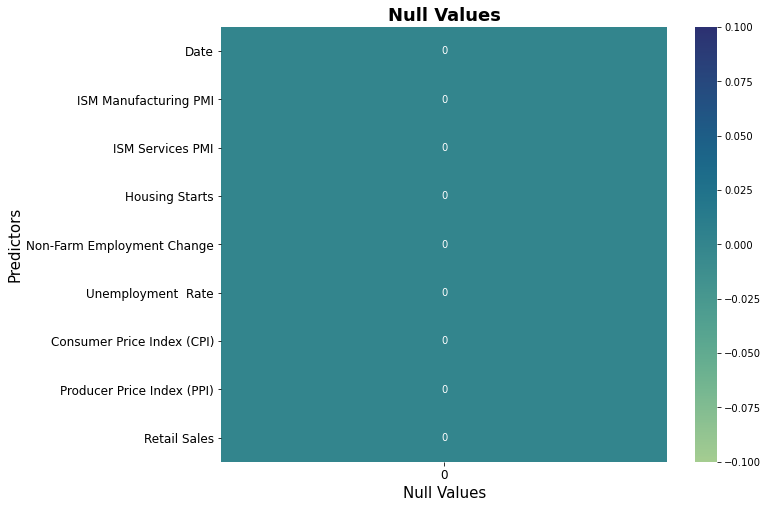

In [5]:
# Check for null values in the DataFrame
# Further investigation of the missing values
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='crest')
ax.set_xlabel('Null Values', fontdict = {'fontsize': 15})
ax.set_ylabel('Predictors', fontdict = {'fontsize': 15})
ax.set_title('Null Values', fontweight='bold', fontdict = {'fontsize': 18})
plt.tick_params(axis='both', labelsize=12)
plt.show()

- no null values in the data set whatsoever

In [6]:
# Check for duplicated rows in the DataFrame
duplicated_rows = df.duplicated()

if any(duplicated_rows):
    print("\nDuplicated rows:")
    print(df[duplicated_rows])
else:
    print("No duplicated rows found.")

No duplicated rows found.


In [13]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

# Convert 'Housing Starts' column to numerical values and rename
df['Housing Starts (M)'] = df['Housing Starts'].str.rstrip('M').astype(float)

# Convert 'Non-Farm Employment Change' column to numerical values and rename
df['Non-Farm Employment Ch (k)'] = df['Non-Farm Employment Change'].str.rstrip('K').astype(float)

# Convert 'Unemployment Rate ' column to numerical values and rename
df['Unemployment Rate (%)'] = df['Unemployment  Rate'].str.rstrip('%').astype(float)

# Convert 'Unemployment Rate ' column to numerical values and rename
df['Retail Sales (%)'] = df['Retail Sales'].str.rstrip('%').astype(float)

# Convert 'Producer Price Index (PPI)' column to numerical values and rename
df['Producer Price Index (PPI) (%)'] = df['Producer Price Index (PPI)'].str.rstrip('%').astype(float)

# Convert 'Consumer Price Index (CPI)' column to numerical values and rename
df['Consumer Price Index (CPI) (%)'] = df['Consumer Price Index (CPI)'].str.rstrip('%').astype(float)

# List the column names for plotting (excluding 'Date', original columns)
column_names = df.columns.difference(['Date', 'Housing Starts', 'Non-Farm Employment Change', 'Consumer Price Index (CPI)',
                                      'Producer Price Index (PPI)', 'Retail Sales', 'Unemployment  Rate'])

df


Date  ISM Manufacturing PMI  ISM Services PMI Housing Starts  \
0   2010-02-01                   58.4              50.5          0.59M   
1   2010-03-01                   56.5              53.0          0.58M   
2   2010-04-01                   59.6              55.4          0.63M   
3   2010-05-01                   60.4              55.4          0.67M   
4   2010-06-01                   59.7              55.4          0.59M   
..         ...                    ...               ...            ...   
156 2023-02-01                   47.4              55.2          1.31M   
157 2023-03-01                   47.7              55.1          1.45M   
158 2023-04-01                   46.3              51.2          1.42M   
159 2023-05-01                   47.1              51.9          1.40M   
160 2023-06-01                   46.9              50.3          1.63M   

    Non-Farm Employment Change Unemployment  Rate Consumer Price Index (CPI)  \
0                         -20K              9.70%                      0.20%   
1                         -36K              9.70%                      0.00%   
2                         162K              9.70%                      0.10%   
3                         290K              9.90%                     -0.10%   
4                         431K              9.70%                     -0.20%   
..                         ...                ...                        ...   
156                       517K              3.40%                      0.50%   
157                       311K              3.60%                      0.40%   
158                       236K              3.50%                      0.10%   
159                       253K              3.40%                      0.40%   
160                       339K              3.70%                      0.10%   

    Producer Price Index (PPI) Retail Sales  Housing Starts (M)  \
0                        1.40%        0.50%                0.59   
1                       -0.60%        0.30%                0.58   
2                        0.70%        1.60%                0.63   
3                       -0.10%        0.40%                0.67   
4                       -0.30%       -1.20%                0.59   
..                         ...          ...                 ...   
156                      0.70%        3.00%                1.31   
157                     -0.10%       -0.40%                1.45   
158                     -0.50%       -1.00%                1.42   
159                      0.20%        0.40%                1.40   
160                     -0.30%        0.30%                1.63   

     Non-Farm Employment Ch (k)  Unemployment Rate (%)  Retail Sales (%)  \
0                         -20.0                    9.7               0.5   
1                         -36.0                    9.7               0.3   
2                         162.0                    9.7               1.6   
3                         290.0                    9.9               0.4   
4                         431.0                    9.7              -1.2   
..                          ...                    ...               ...   
156                       517.0                    3.4               3.0   
157                       311.0                    3.6              -0.4   
158                       236.0                    3.5              -1.0   
159                       253.0                    3.4               0.4   
160                       339.0                    3.7               0.3   

     Producer Price Index (PPI) (%)  Consumer Price Index (CPI) (%)  
0                               1.4                             0.2  
1                              -0.6                             0.0  
2                               0.7                             0.1  
3                              -0.1                            -0.1  
4                              -0.3                            -0.2  
..                    

In [14]:
# Display the modified DataFrame
print(df.dtypes)

Date                              datetime64[ns]
ISM Manufacturing PMI                    float64
ISM Services PMI                         float64
Housing Starts                            object
Non-Farm Employment Change                object
Unemployment  Rate                        object
Consumer Price Index (CPI)                object
Producer Price Index (PPI)                object
Retail Sales                              object
Housing Starts (M)                       float64
Non-Farm Employment Ch (k)               float64
Unemployment Rate (%)                    float64
Retail Sales (%)                         float64
Producer Price Index (PPI) (%)           float64
Consumer Price Index (CPI) (%)           float64
dtype: object


- in order for the data to be trained for machine learning the columns labeled as object will need to be changed to float

In [16]:
# Convert the specified columns to float
columns_to_convert = [
    'Housing Starts', 'Non-Farm Employment Change', 'Unemployment  Rate',
    'Consumer Price Index (CPI)', 'Producer Price Index (PPI)', 'Retail Sales'
]

for column in columns_to_convert:
    df[column] = df[column].str.replace('[^\d.-]', '', regex=True).astype(float)

# List the column names for plotting (excluding 'Date', original columns)
column_names = df.columns.difference(['Date', 'Housing Starts', 'Non-Farm Employment Change', 'Consumer Price Index (CPI)',
                                      'Producer Price Index (PPI)', 'Retail Sales', 'Unemployment  Rate'])

df


Date  ISM Manufacturing PMI  ISM Services PMI  Housing Starts  \
0   2010-02-01                   58.4              50.5            0.59   
1   2010-03-01                   56.5              53.0            0.58   
2   2010-04-01                   59.6              55.4            0.63   
3   2010-05-01                   60.4              55.4            0.67   
4   2010-06-01                   59.7              55.4            0.59   
..         ...                    ...               ...             ...   
156 2023-02-01                   47.4              55.2            1.31   
157 2023-03-01                   47.7              55.1            1.45   
158 2023-04-01                   46.3              51.2            1.42   
159 2023-05-01                   47.1              51.9            1.40   
160 2023-06-01                   46.9              50.3            1.63   

     Non-Farm Employment Change  Unemployment  Rate  \
0                         -20.0                 9.7   
1                         -36.0                 9.7   
2                         162.0                 9.7   
3                         290.0                 9.9   
4                         431.0                 9.7   
..                          ...                 ...   
156                       517.0                 3.4   
157                       311.0                 3.6   
158                       236.0                 3.5   
159                       253.0                 3.4   
160                       339.0                 3.7   

     Consumer Price Index (CPI)  Producer Price Index (PPI)  Retail Sales  \
0                           0.2                         1.4           0.5   
1                           0.0                        -0.6           0.3   
2                           0.1                         0.7           1.6   
3                          -0.1                        -0.1           0.4   
4                          -0.2                        -0.3          -1.2   
..                          ...                         ...           ...   
156                         0.5                         0.7           3.0   
157                         0.4                        -0.1          -0.4   
158                         0.1                        -0.5          -1.0   
159                         0.4                         0.2           0.4   
160                         0.1                        -0.3           0.3   

     Housing Starts (M)  Non-Farm Employment Ch (k)  Unemployment Rate (%)  \
0                  0.59                       -20.0                    9.7   
1                  0.58                       -36.0                    9.7   
2                  0.63                       162.0                    9.7   
3                  0.67                       290.0                    9.9   
4                  0.59                       431.0                    9.7   
..                  ...                         ...                    ...   
156                1.31                       517.0                    3.4   
157                1.45                       311.0                    3.6   
158                1.42                       236.0                    3.5   
159                1.40                       253.0                    3.4   
160                1.63                       339.0                    3.7   

     Retail Sales (%)  Producer Price Index (PPI) (%)  \
0                 0.5                             1.4   
1                 0.3                            -0.6   
2                 1.6                             0.7   
3                 0.4                            -0.1   
4                -1.2                            -0.3   
..                ...                             ...   
156               3.0                             0.7   
157              -0.4                            -0.1   
158              -1.0                            -0.5   
159             

In [17]:
print(df.dtypes)

Date                              datetime64[ns]
ISM Manufacturing PMI                    float64
ISM Services PMI                         float64
Housing Starts                           float64
Non-Farm Employment Change               float64
Unemployment  Rate                       float64
Consumer Price Index (CPI)               float64
Producer Price Index (PPI)               float64
Retail Sales                             float64
Housing Starts (M)                       float64
Non-Farm Employment Ch (k)               float64
Unemployment Rate (%)                    float64
Retail Sales (%)                         float64
Producer Price Index (PPI) (%)           float64
Consumer Price Index (CPI) (%)           float64
dtype: object


# Exploratory Data Analysis

<Figure size 720x432 with 0 Axes>

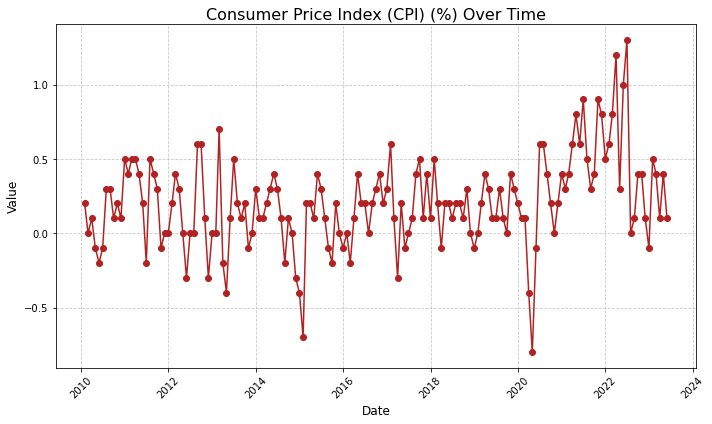

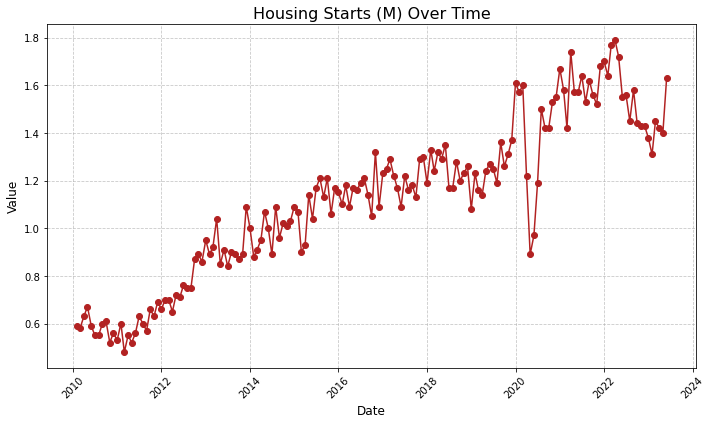

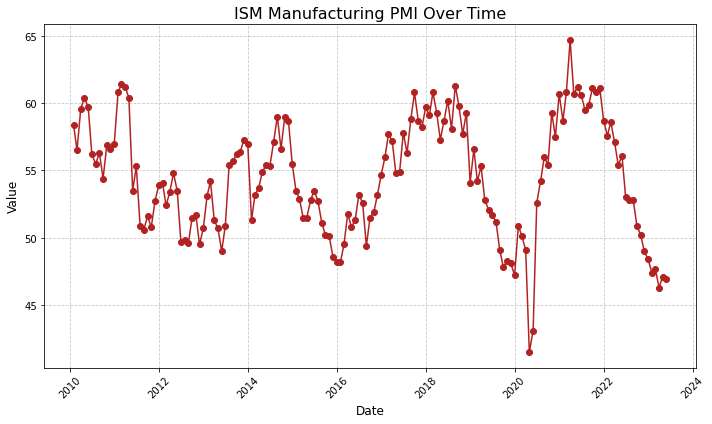

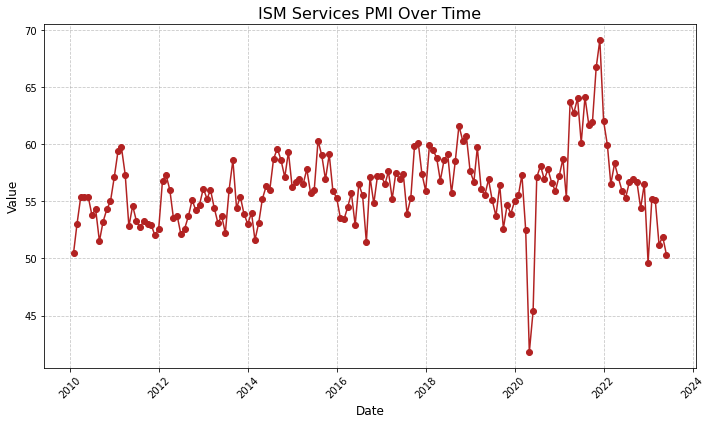

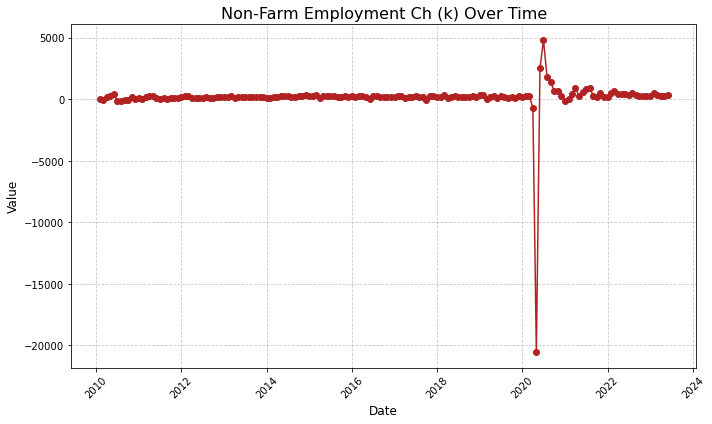

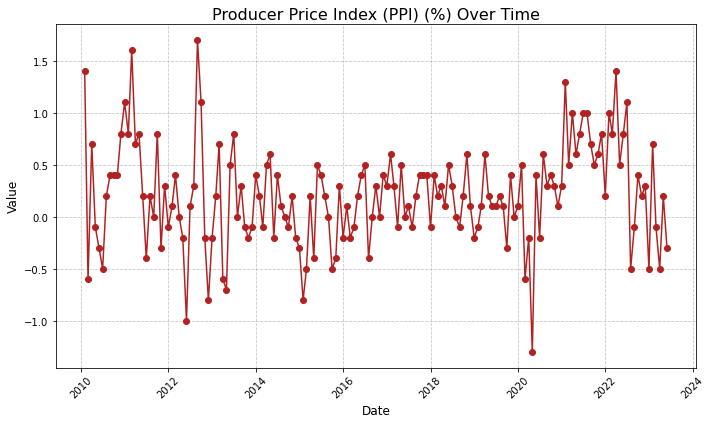

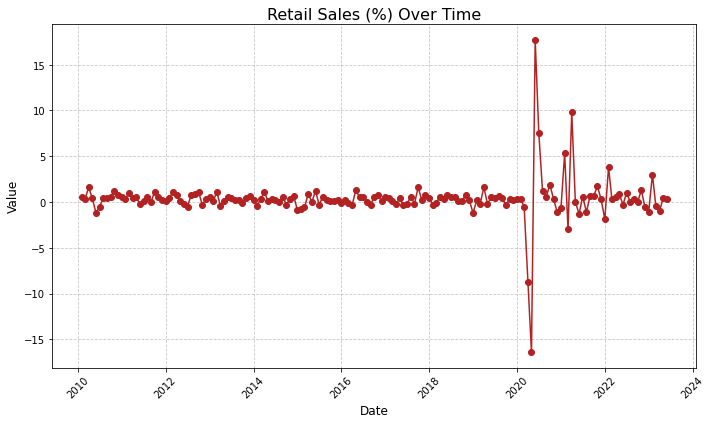

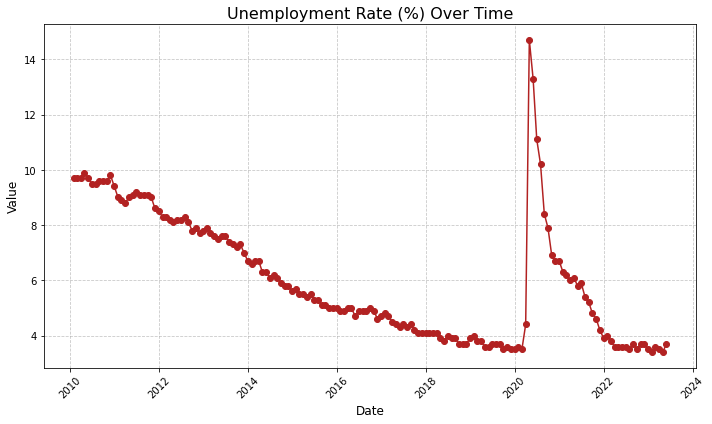

In [18]:
# Set larger figure size
plt.figure(figsize=(10, 6))

# Plot each column in separate plots
for column in column_names:
    plt.figure(figsize=(10, 6))  # Create a new figure for each column
    plt.plot(df['Date'], df[column], marker='o', color='firebrick')
    plt.title(f'{column} Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()

   

    # Show the plot
    plt.show()

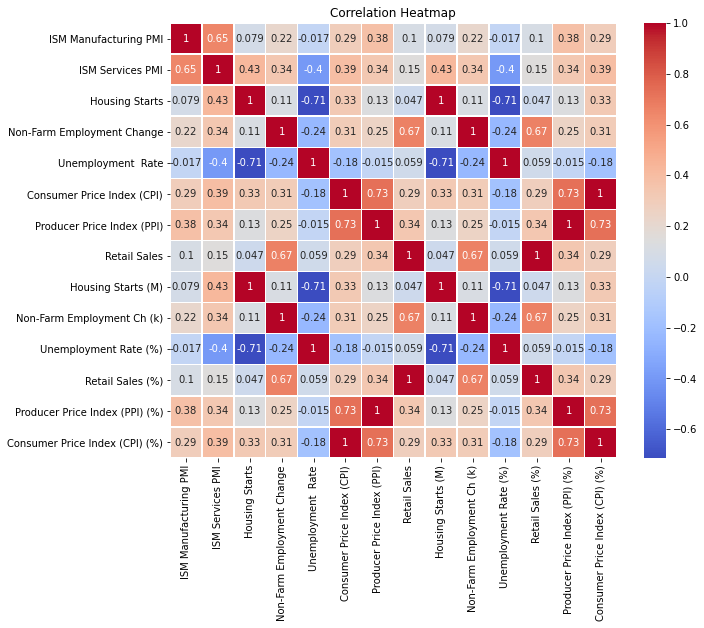

In [19]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Create a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

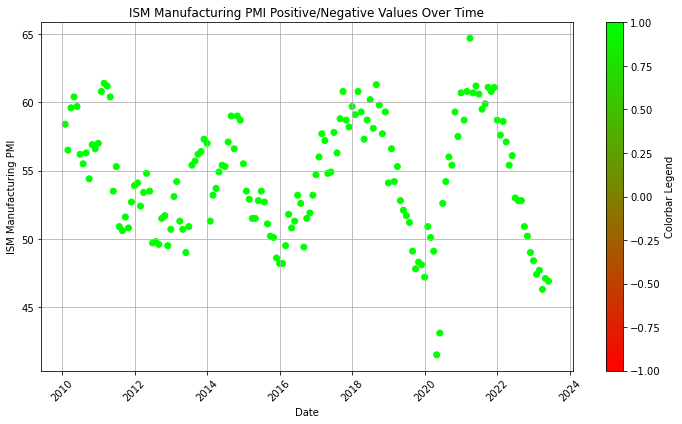

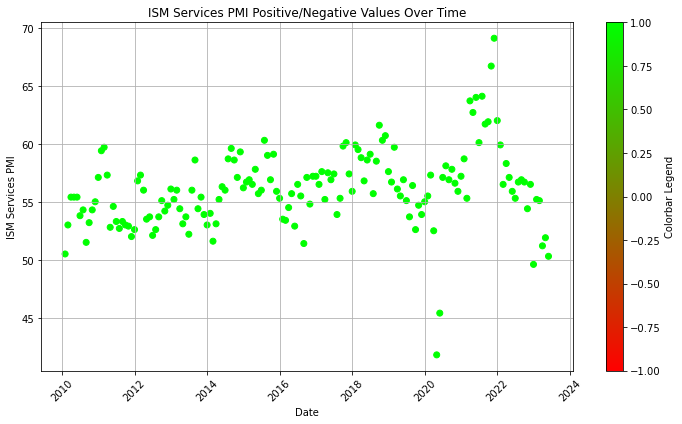

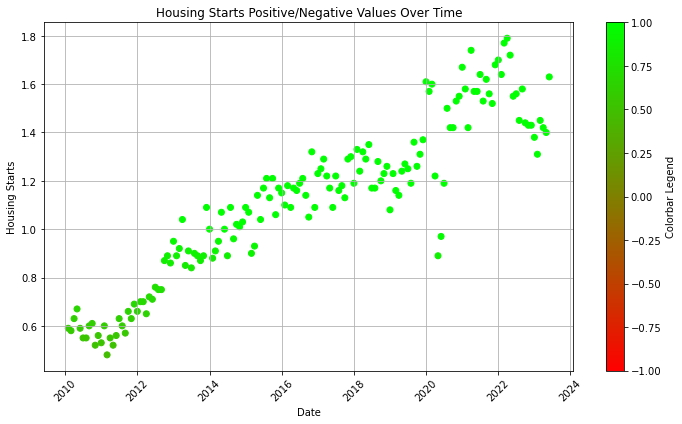

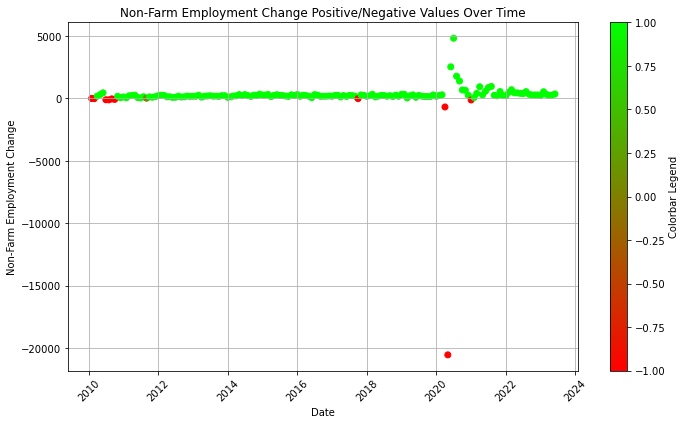

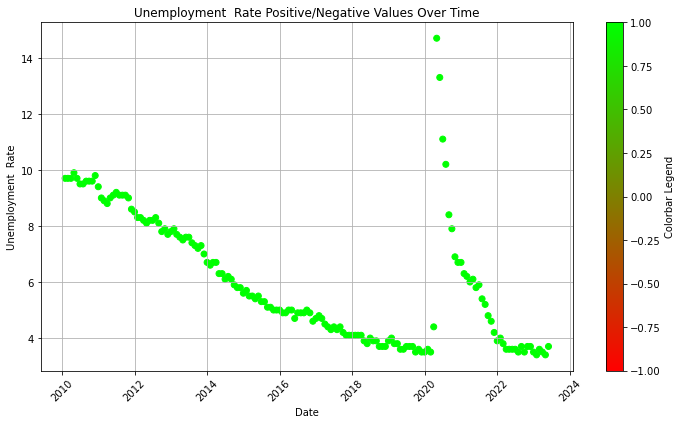

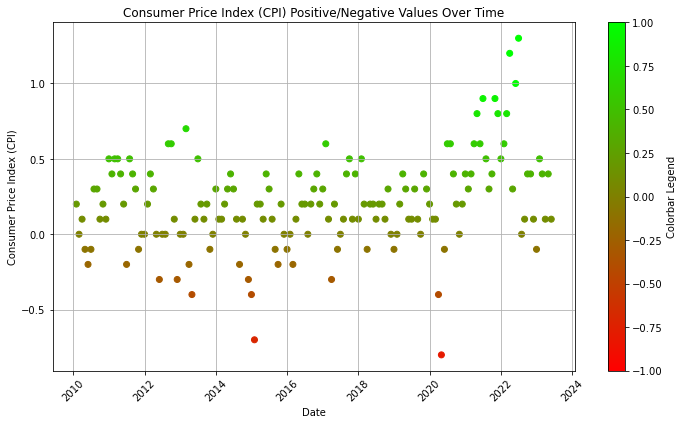

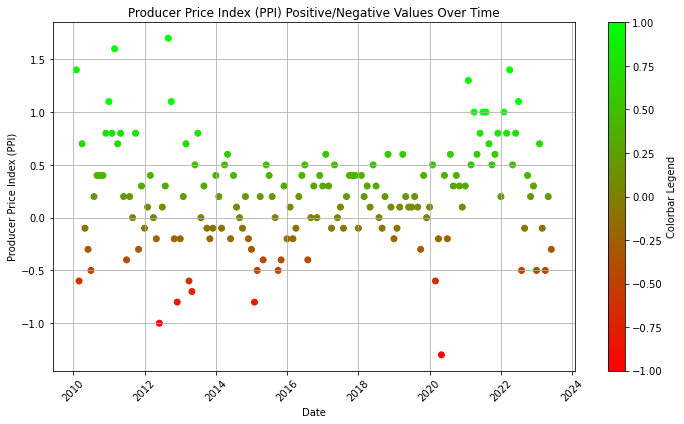

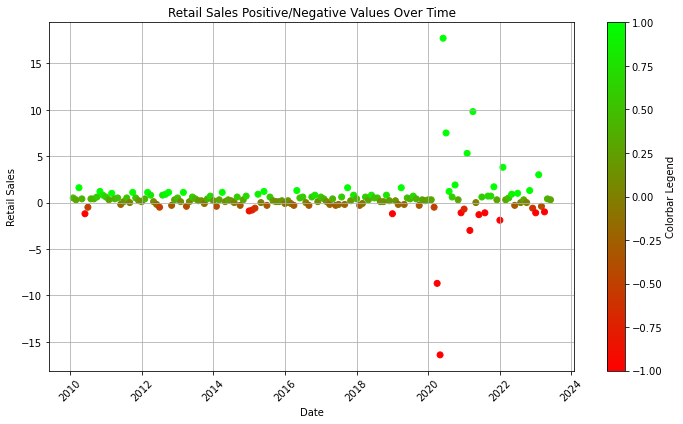

In [20]:
# List of columns to plot
columns_to_plot = [
    'ISM Manufacturing PMI', 'ISM Services PMI', 'Housing Starts',
    'Non-Farm Employment Change', 'Unemployment  Rate',
    'Consumer Price Index (CPI)', 'Producer Price Index (PPI)',
    'Retail Sales'
]

# Create a custom colormap from red to green
colors = [(1, 0, 0), (0, 1, 0)]
cmap = LinearSegmentedColormap.from_list('RedGreen', colors, N=256)

# Normalize the colors based on values
norm = mcolors.Normalize(vmin=-1, vmax=1)

# Create a plot for each column showing positive/negative values over time
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Color mapping: green for positive values, red for negative values
    colors = [cmap(norm(val)) for val in df[column]]
    
    plt.scatter(df['Date'], df[column], c=colors, marker='o')
    
    plt.title(f'{column} Positive/Negative Values Over Time')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    
    # Add colorbar legend ranging from red (negative) to green (positive)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, orientation='vertical')
    cbar.set_label('Colorbar Legend')
    
    # Add grid
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

In [21]:
# List of columns to analyze
columns_to_analyze = [
    'ISM Manufacturing PMI', 'ISM Services PMI', 'Housing Starts',
    'Non-Farm Employment Change', 'Unemployment  Rate',
    'Consumer Price Index (CPI)', 'Producer Price Index (PPI)',
    'Retail Sales']

# Analyze whether values are positive or negative for each column
for column in columns_to_analyze:
    positive_count = df[df[column] > 0].shape[0]
    negative_count = df[df[column] < 0].shape[0]
    
    print(f"Column: {column}")
    print(f"Positive Count: {positive_count}")
    print(f"Negative Count: {negative_count}")
    
    if positive_count > negative_count:
        print("More Positive")
    elif positive_count < negative_count:
        print("More Negative")
    else:
        print("Equal Positive and Negative")
    
    print()

Column: ISM Manufacturing PMI
Positive Count: 161
Negative Count: 0
More Positive

Column: ISM Services PMI
Positive Count: 161
Negative Count: 0
More Positive

Column: Housing Starts
Positive Count: 161
Negative Count: 0
More Positive

Column: Non-Farm Employment Change
Positive Count: 150
Negative Count: 10
More Positive

Column: Unemployment  Rate
Positive Count: 161
Negative Count: 0
More Positive

Column: Consumer Price Index (CPI)
Positive Count: 116
Negative Count: 26
More Positive

Column: Producer Price Index (PPI)
Positive Count: 103
Negative Count: 48
More Positive

Column: Retail Sales
Positive Count: 112
Negative Count: 42
More Positive



- From the plot and the summary above you can see that from 2010 to present, most of the news over time has been positive with a few negative values in the PPI, CPI and retail sales columns. 

- Will attempt to use this information to project whether the news will be positive or negative going forward. 

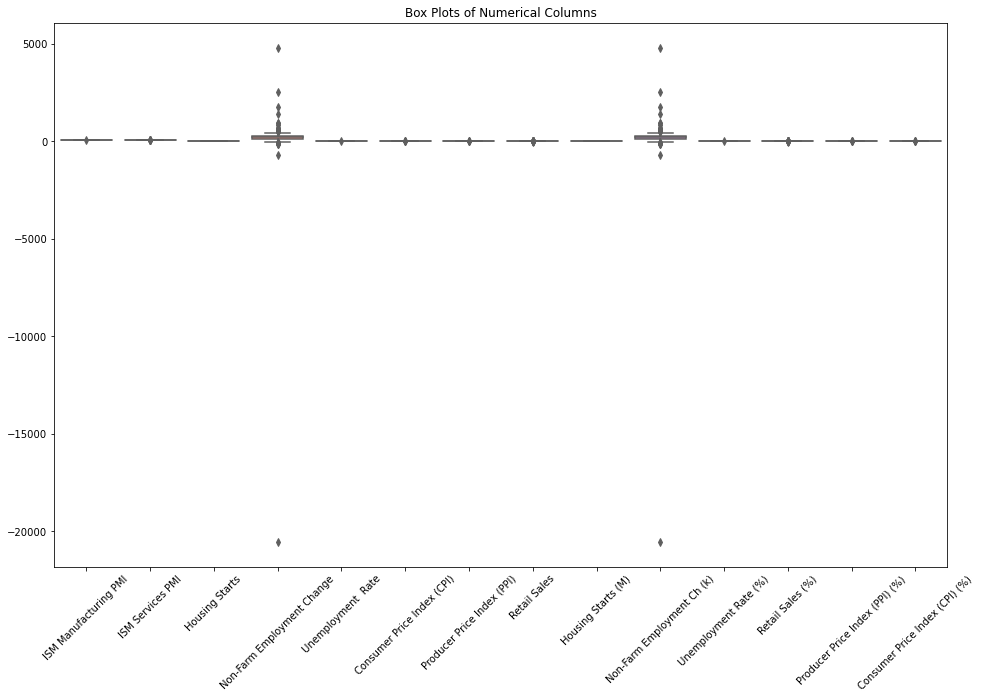

In [22]:
# Create box plots for each numerical column
plt.figure(figsize=(16, 10))  # Increased figure size
colors = sns.color_palette("Set3", n_colors=len(df.columns) - 1)  # Choose a color palette
sns.boxplot(data=df.drop(['Date'], axis=1), palette=colors)  # Use the chosen palette
plt.xticks(rotation=45)
plt.title('Box Plots of Numerical Columns')
plt.show()


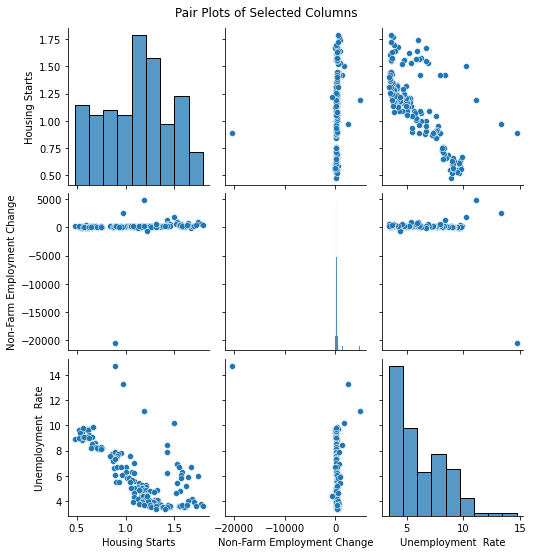

In [23]:
# Create pair plots for selected numerical columns
sns.pairplot(df[['Housing Starts', 'Non-Farm Employment Change', 'Unemployment  Rate']])
plt.suptitle('Pair Plots of Selected Columns', y=1.02)
plt.show()

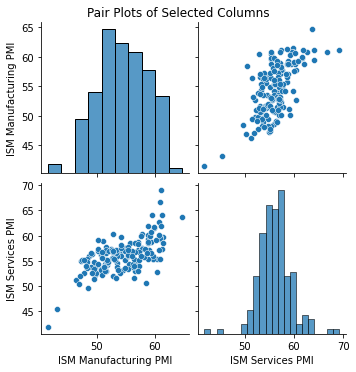

In [24]:
# Create pair plots for selected numerical columns
sns.pairplot(df[['ISM Manufacturing PMI', 'ISM Services PMI']])
plt.suptitle('Pair Plots of Selected Columns', y=1.02)
plt.show()

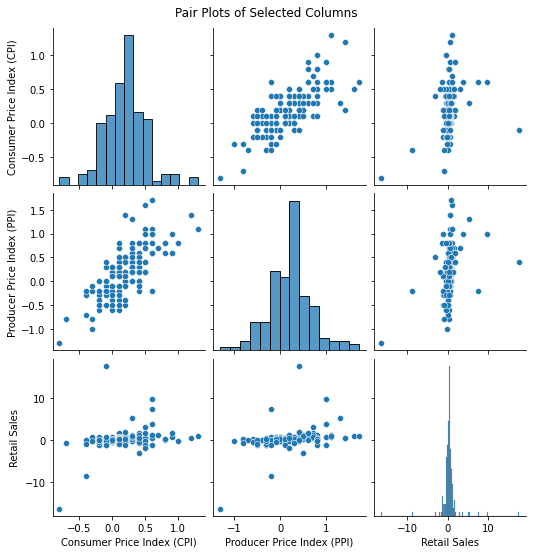

In [25]:
# Create pair plots for selected numerical columns
sns.pairplot(df[['Consumer Price Index (CPI)', 'Producer Price Index (PPI)',
    'Retail Sales']])
plt.suptitle('Pair Plots of Selected Columns', y=1.02)
plt.show()

<Figure size 864x576 with 0 Axes>

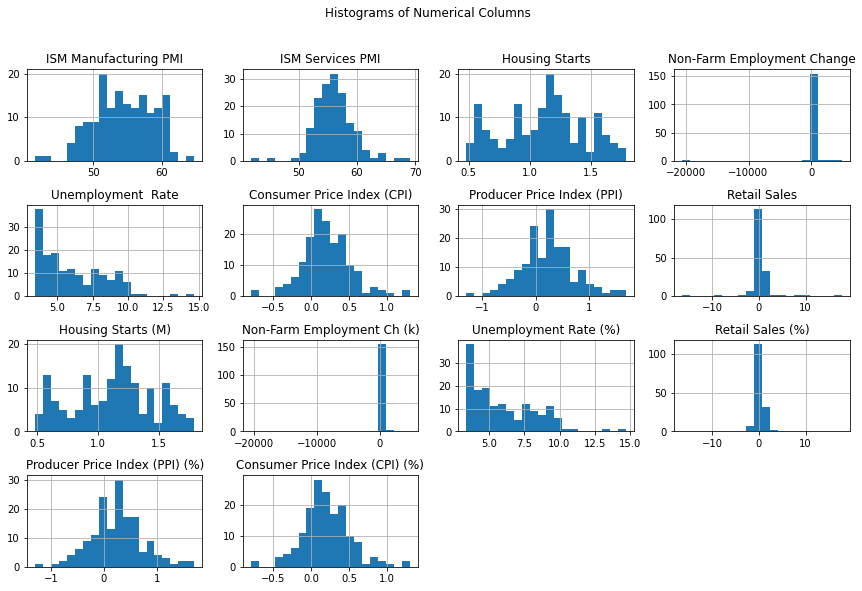

In [26]:
# Create histograms for each numerical column
plt.figure(figsize=(12, 8))
df.drop(['Date'], axis=1).hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Columns', y=1.02)
plt.tight_layout()
plt.show()

# Feature Engineering

Feature engineering can enhance the predictive power of the model by creating new relevant features from the existing data. In the context of economic indicators and time series data, here are a few feature engineering ideas that might help improve the model's performance:

- Lagged Values: Include lagged values of the economic indicators as features. For instance, you can include the values of the indicators from the past few days or months as predictors. This can capture temporal dependencies and patterns in the data.


- Moving Averages: Compute moving averages of the indicators over different time windows. Moving averages can help smooth out noise and highlight trends.


- Differences: Calculate the differences between consecutive values of the indicators. This can capture changes in trends over time.


- Percentage Changes: Compute the percentage changes between consecutive values. This can help capture the magnitude of changes relative to the previous value.

In [27]:
# List of columns to analyze
columns_to_analyze = [
    'ISM Manufacturing PMI', 'ISM Services PMI', 'Housing Starts',
    'Non-Farm Employment Change', 'Unemployment  Rate',
    'Consumer Price Index (CPI)', 'Producer Price Index (PPI)',
    'Retail Sales']

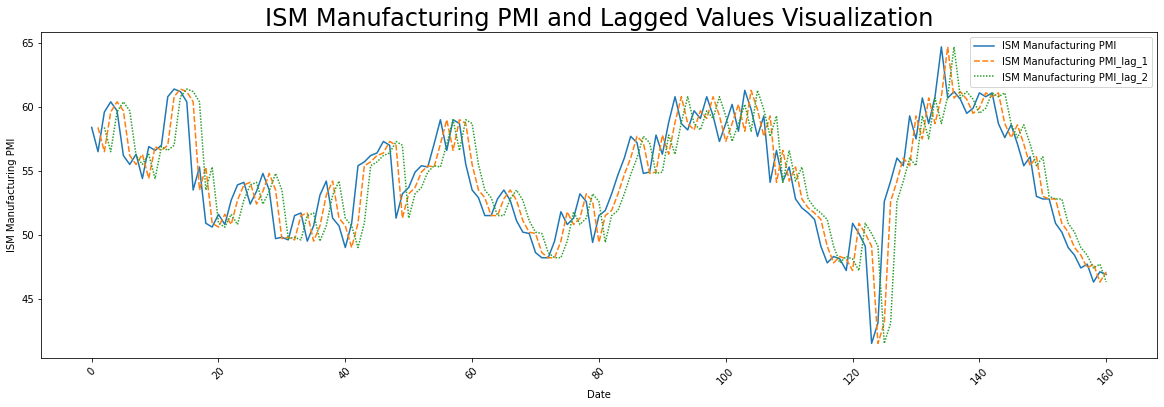

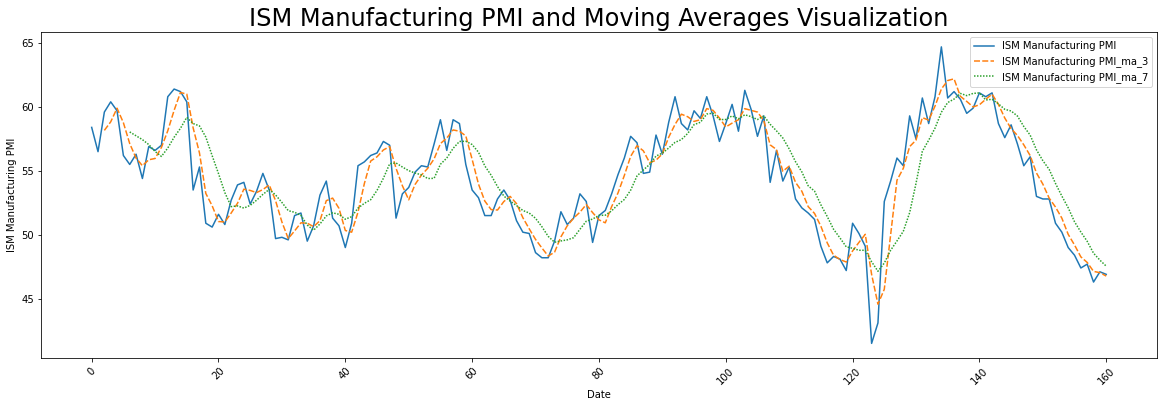

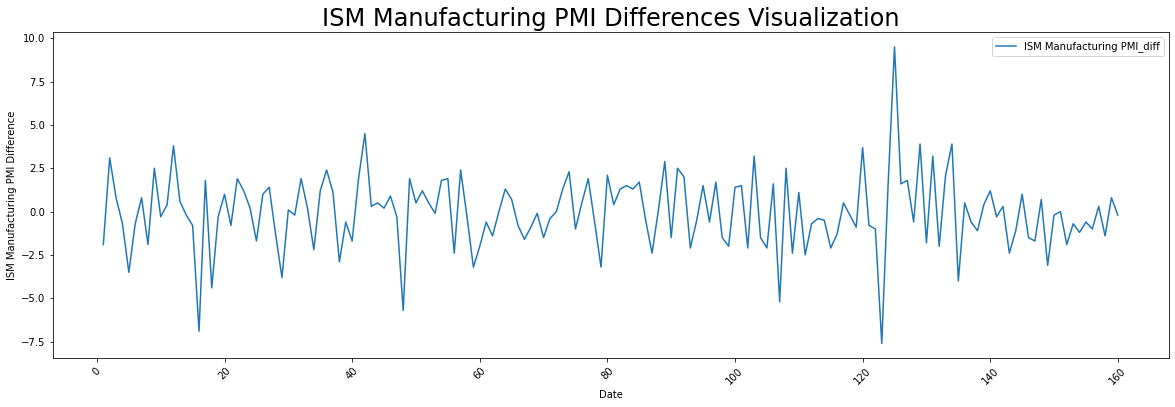

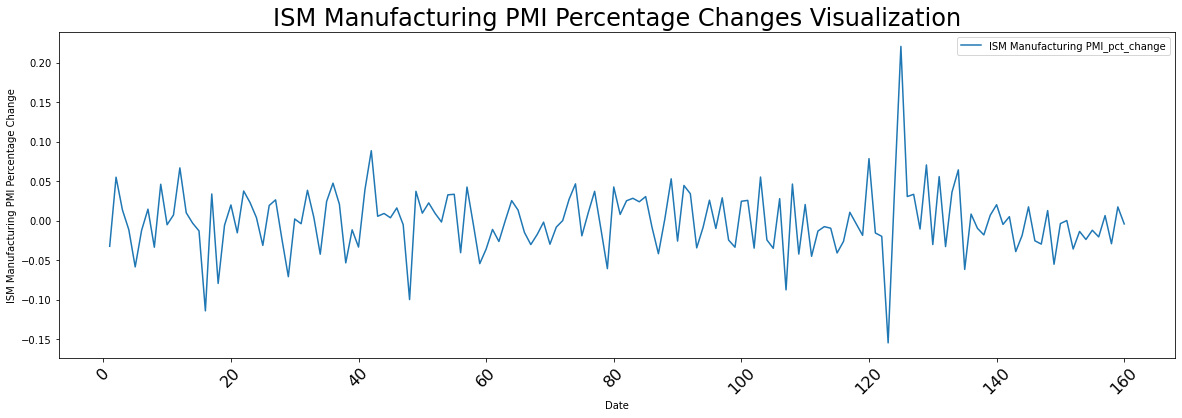

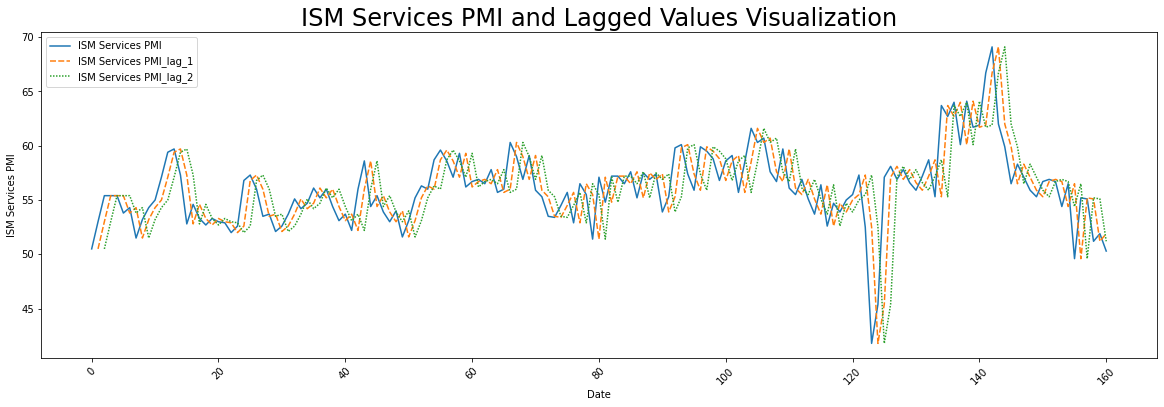

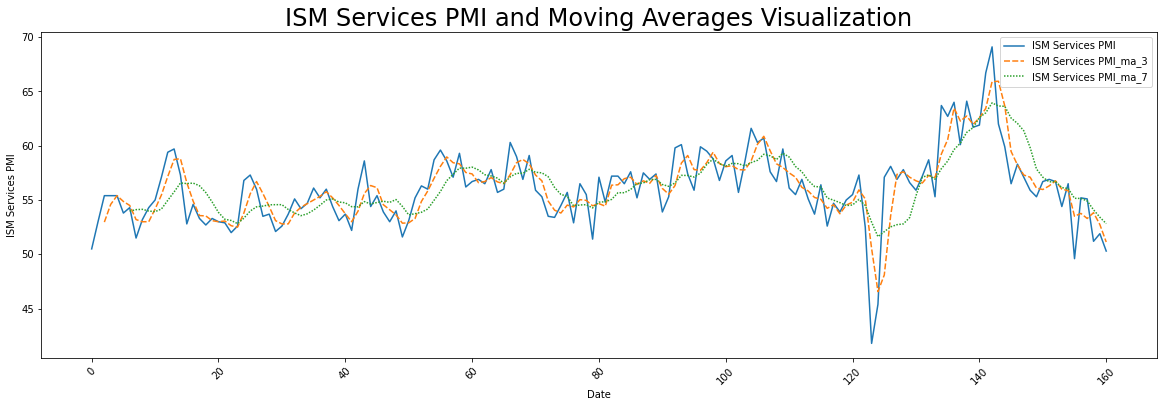

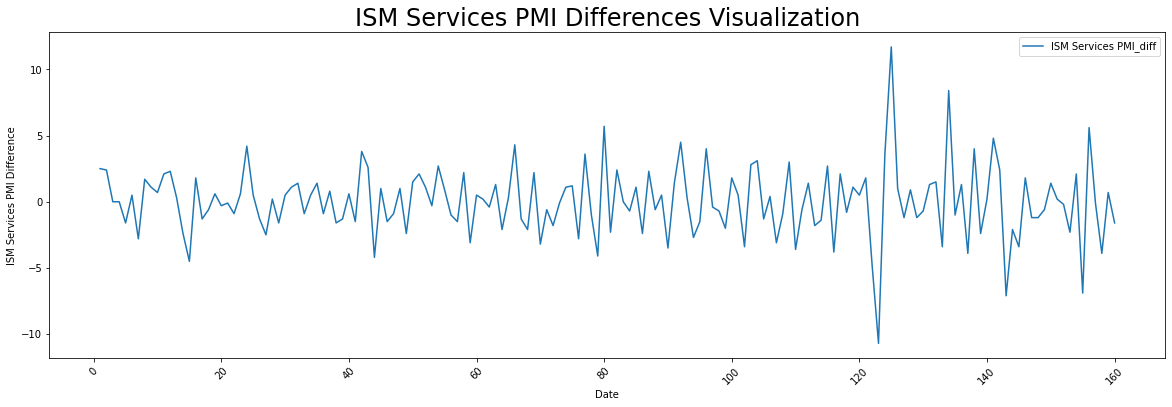

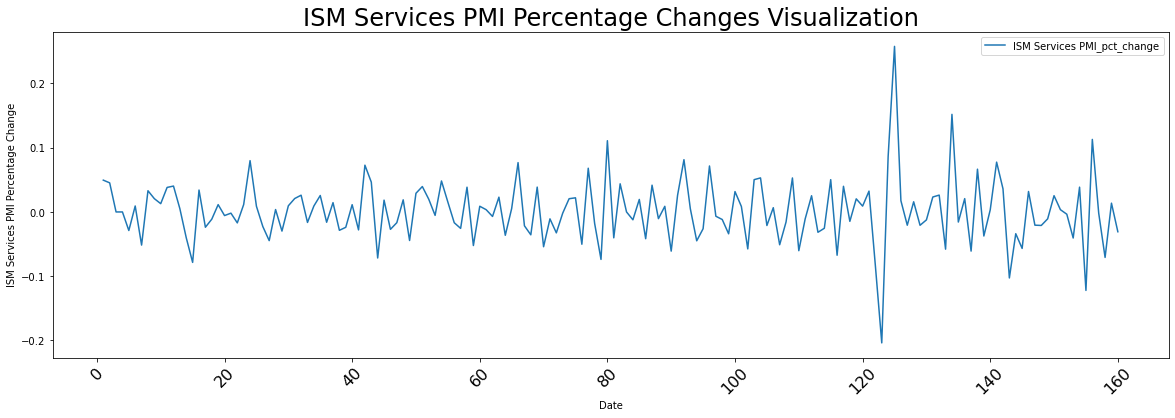

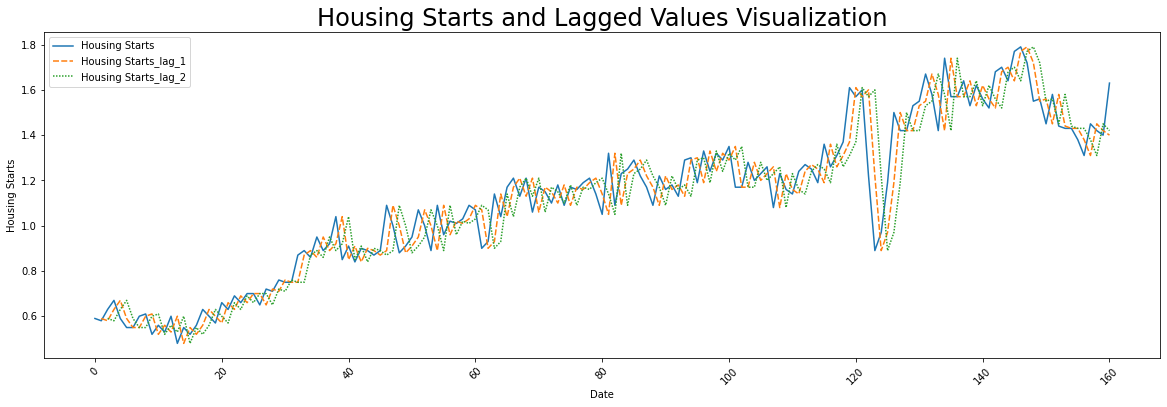

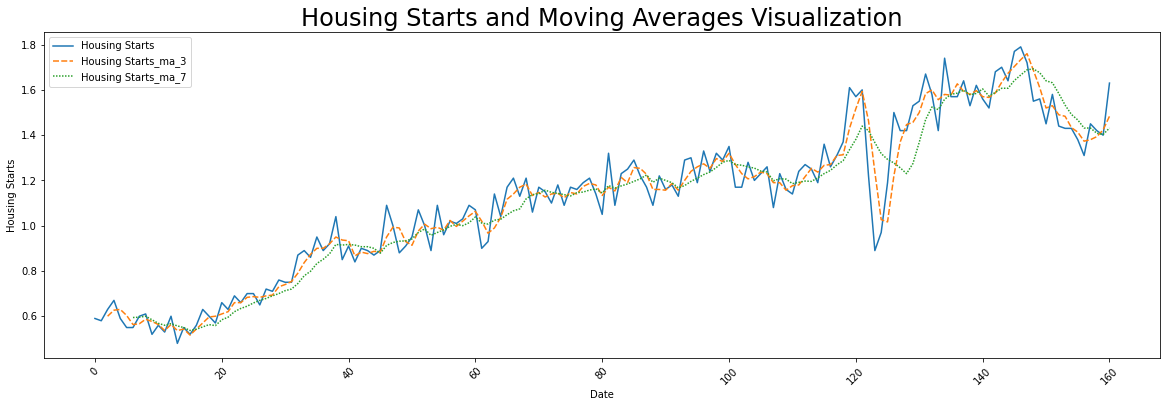

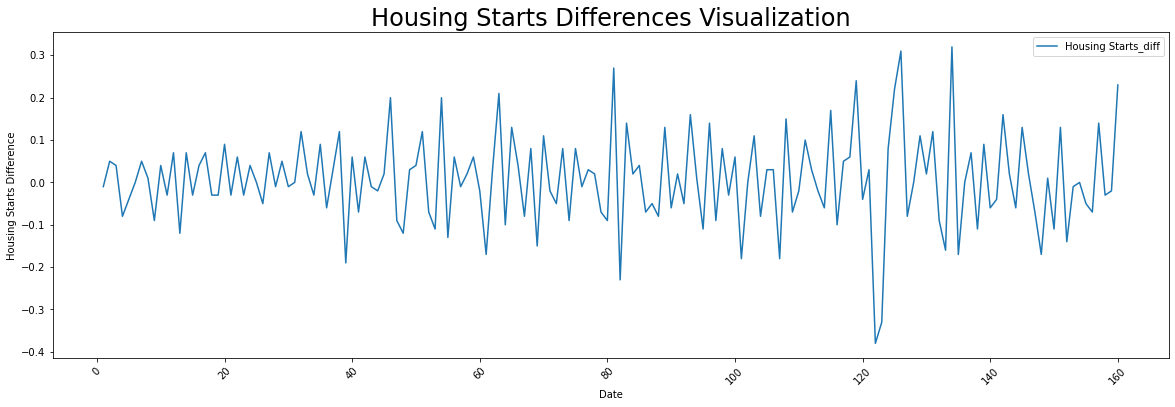

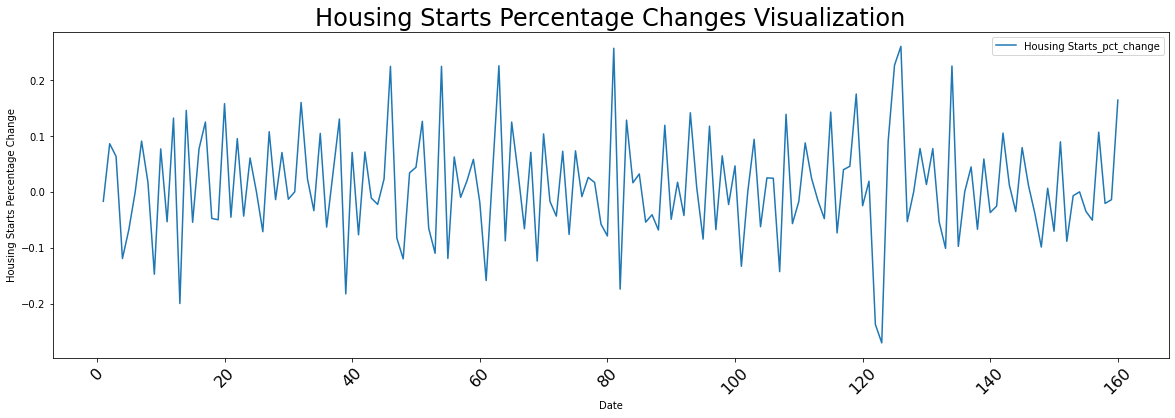

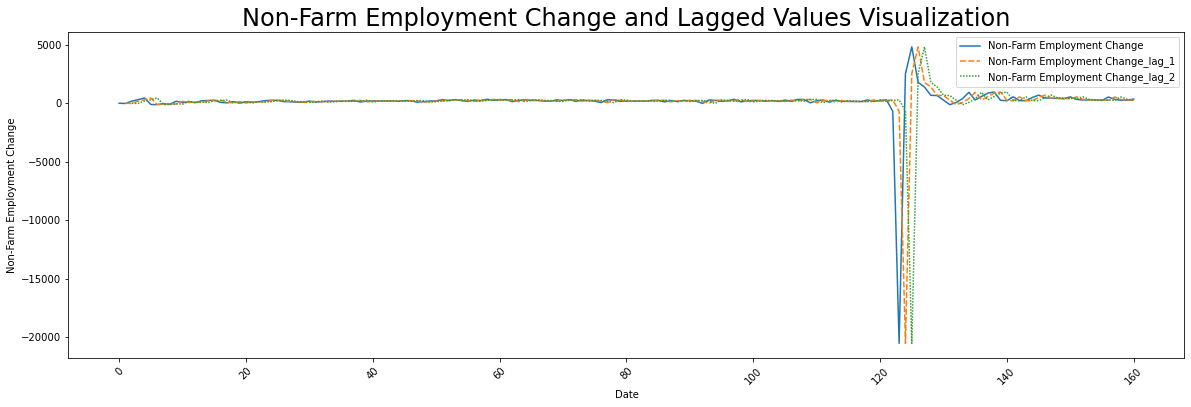

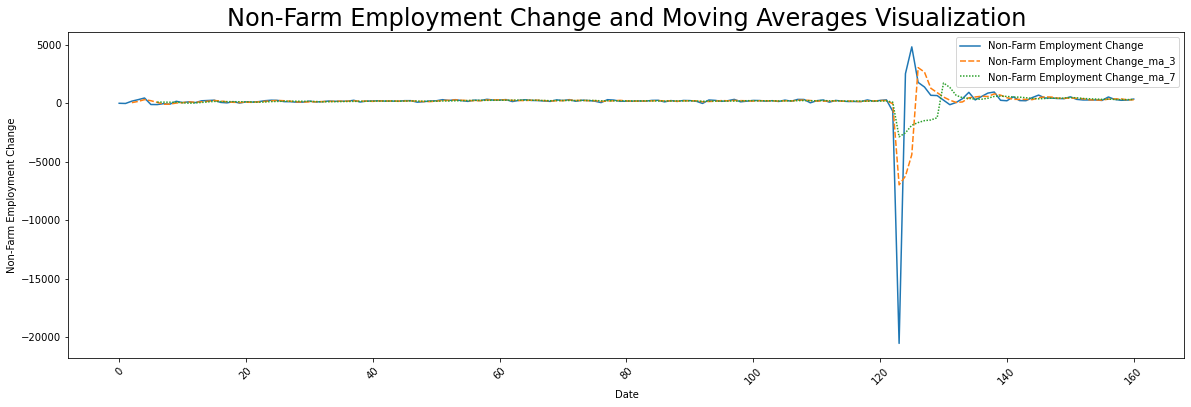

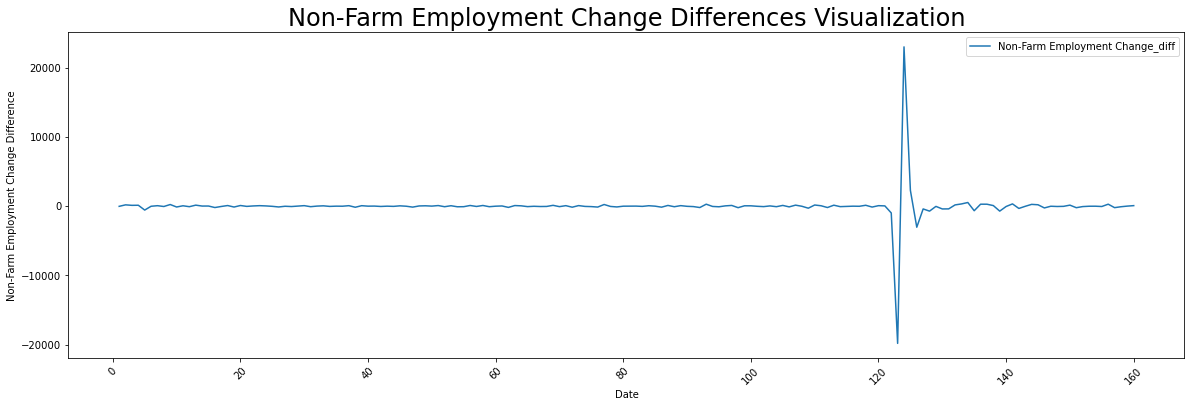

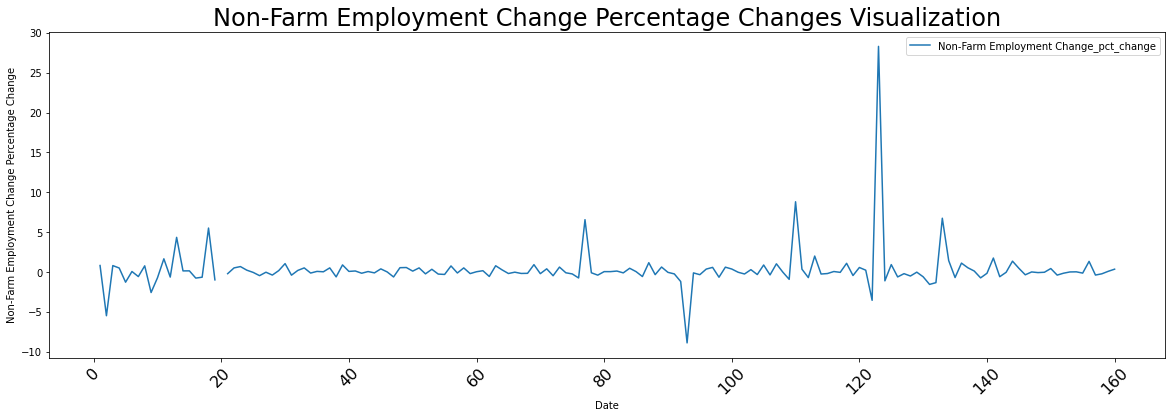

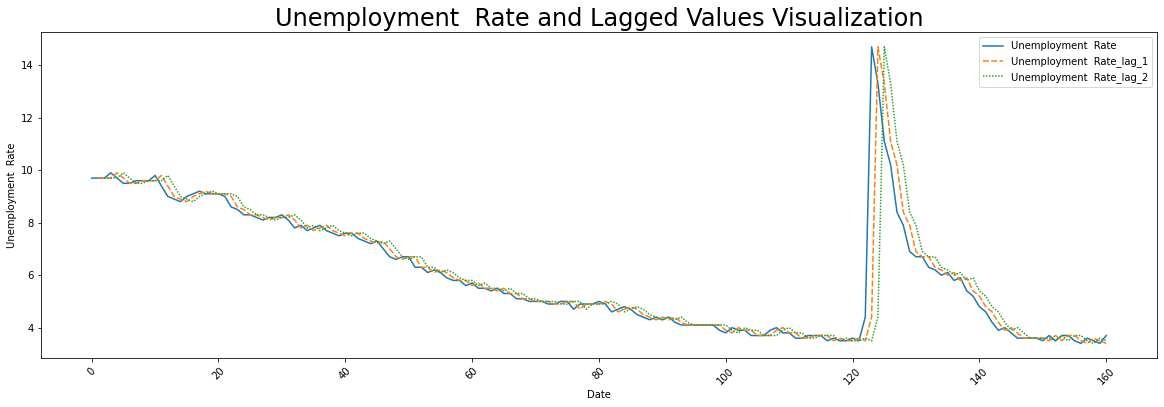

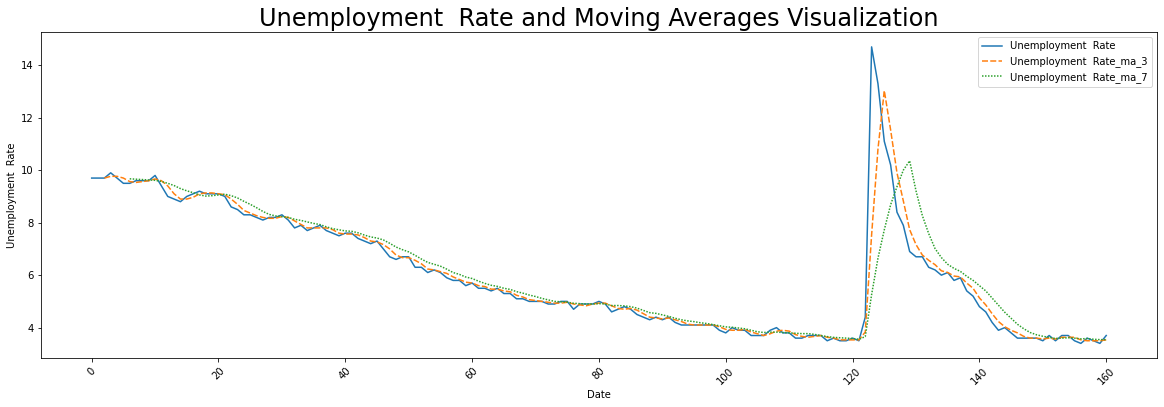

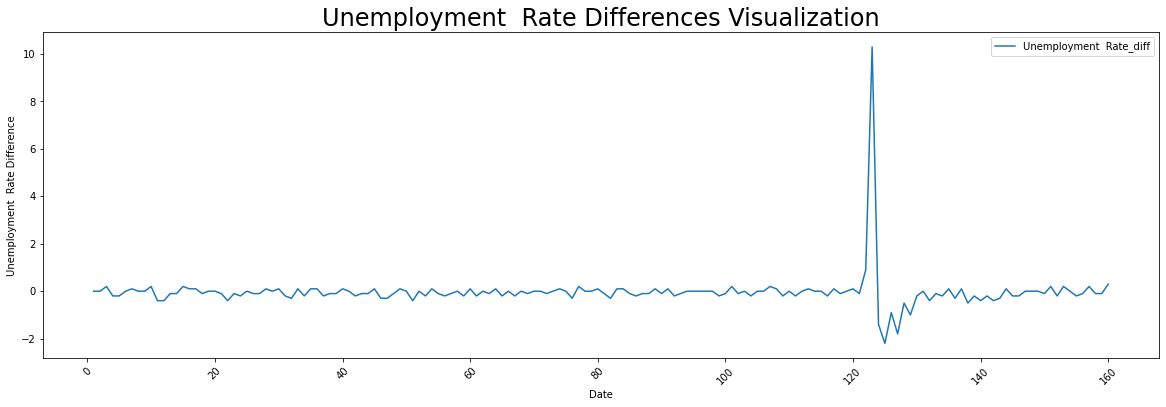

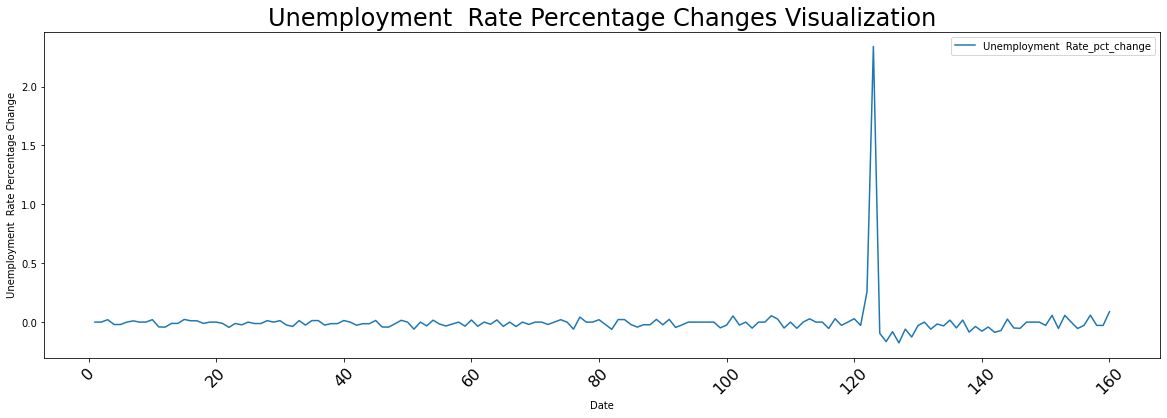

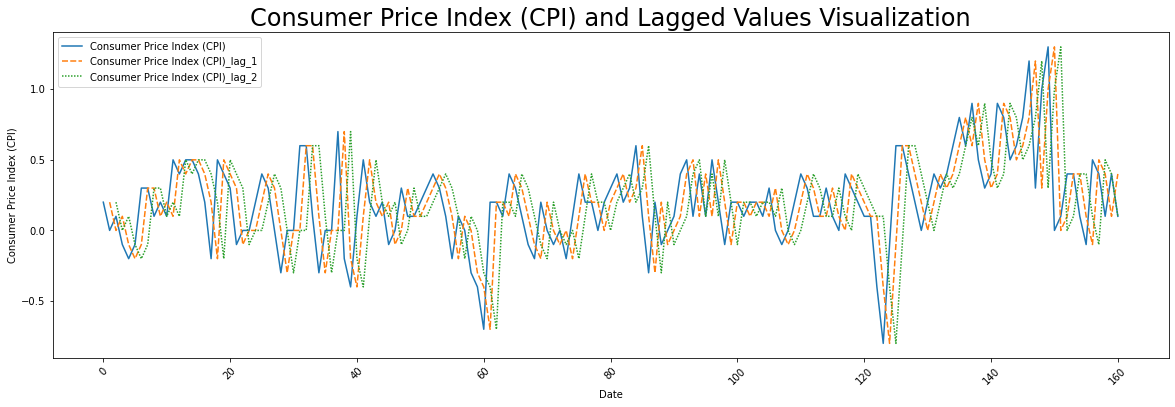

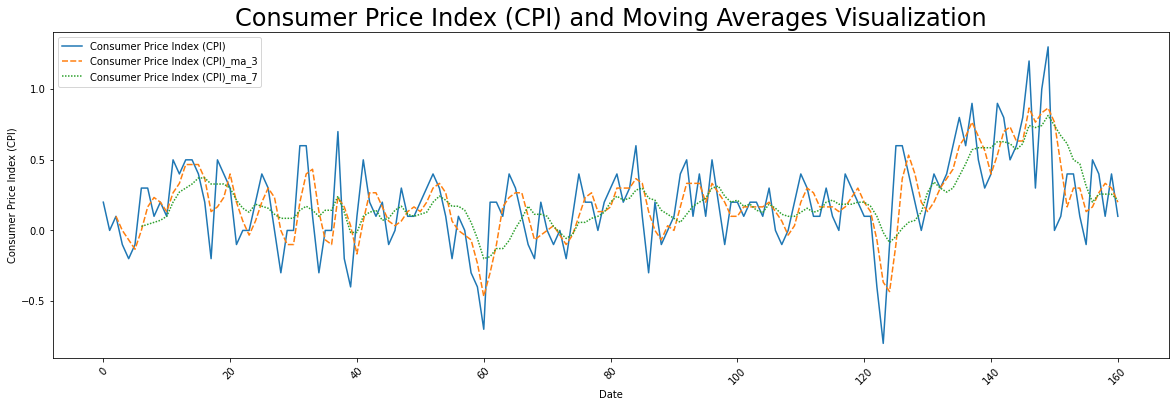

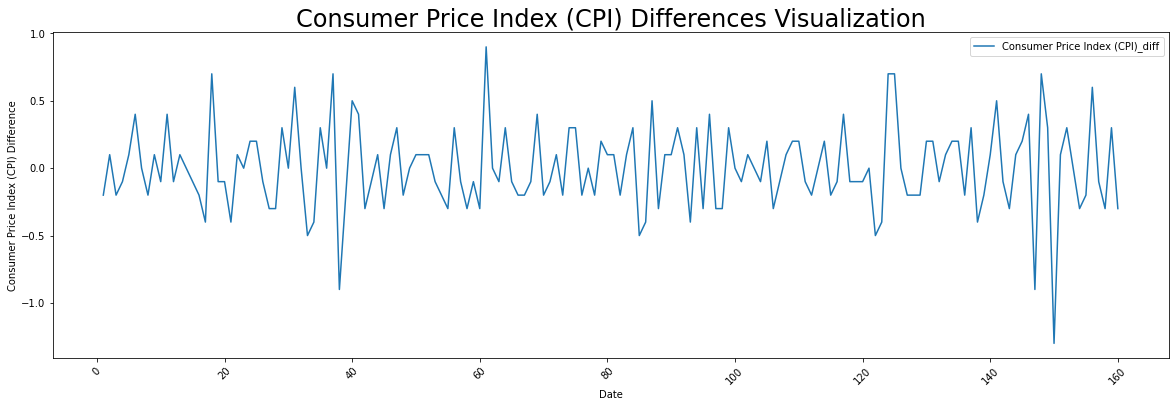

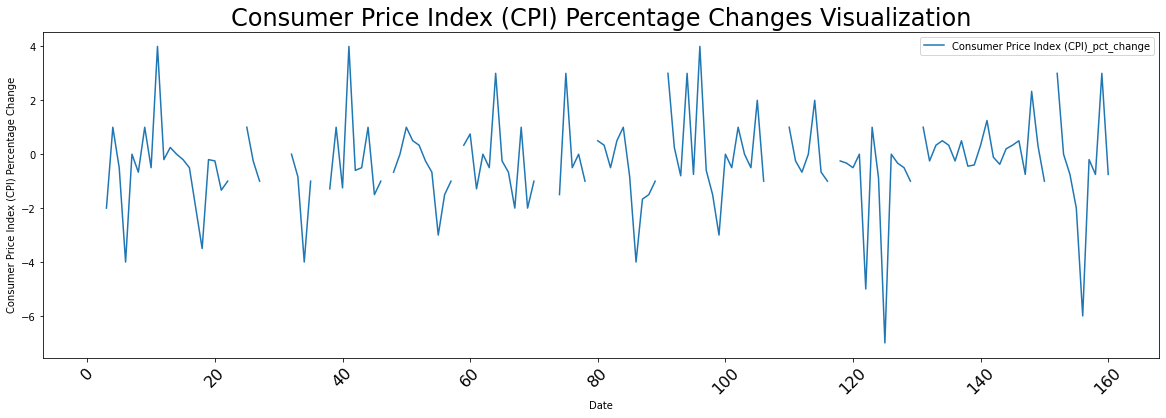

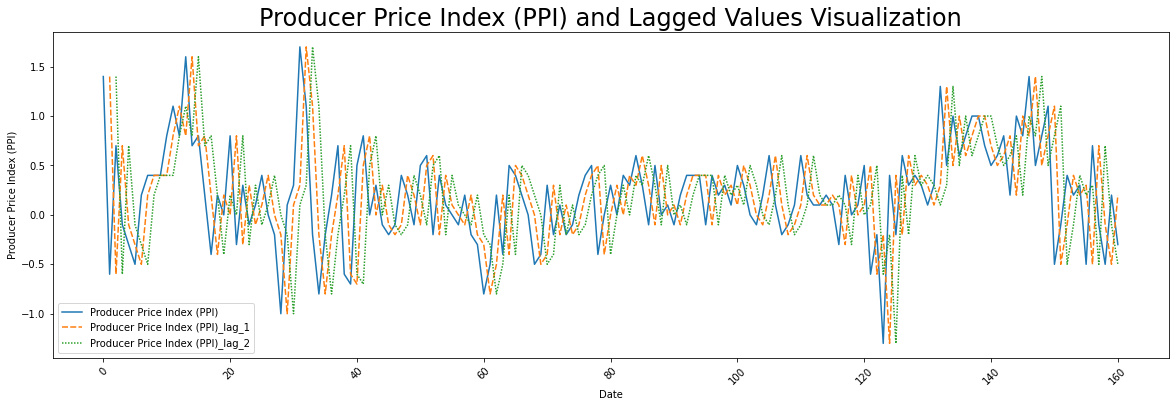

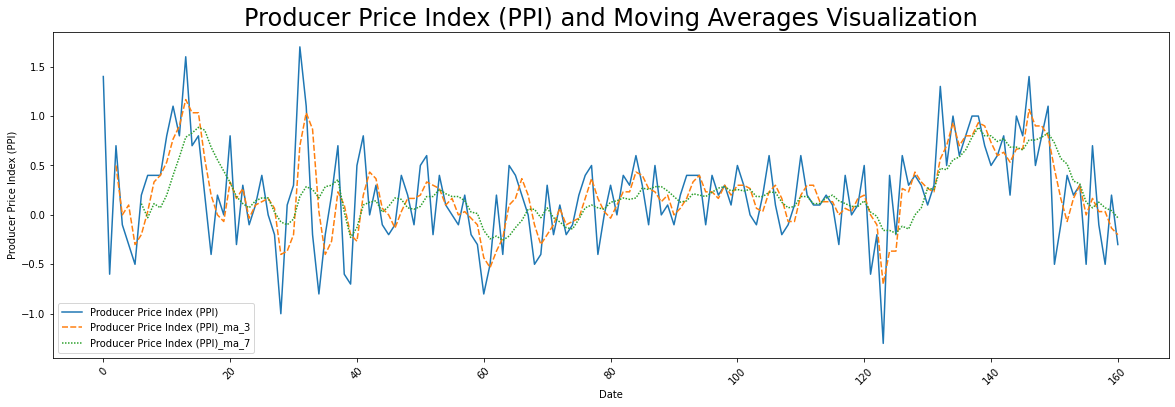

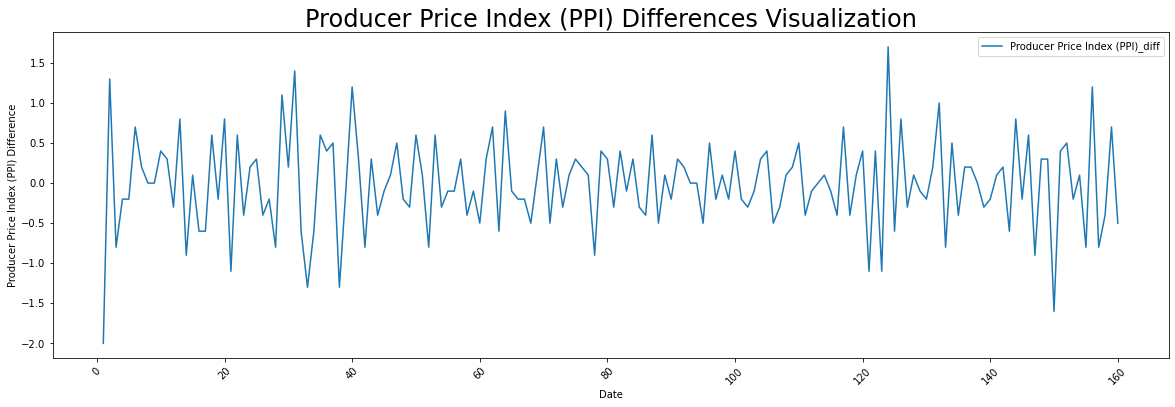

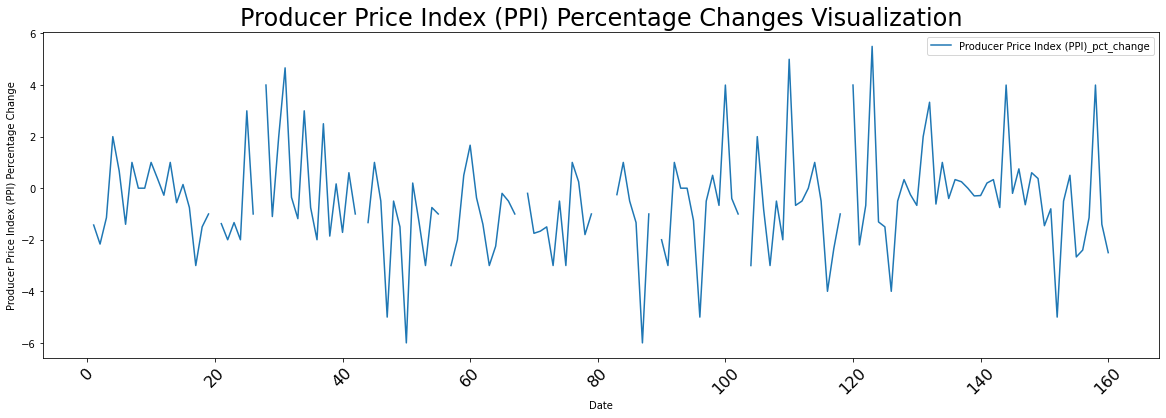

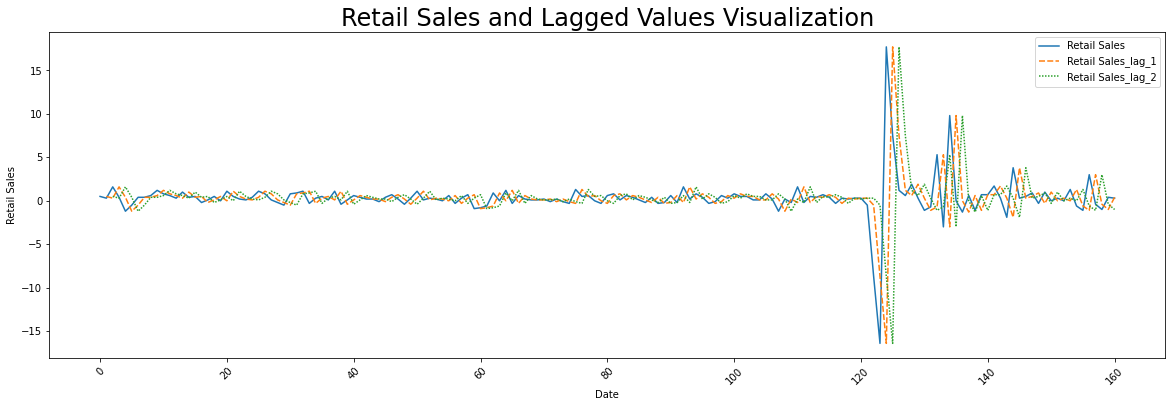

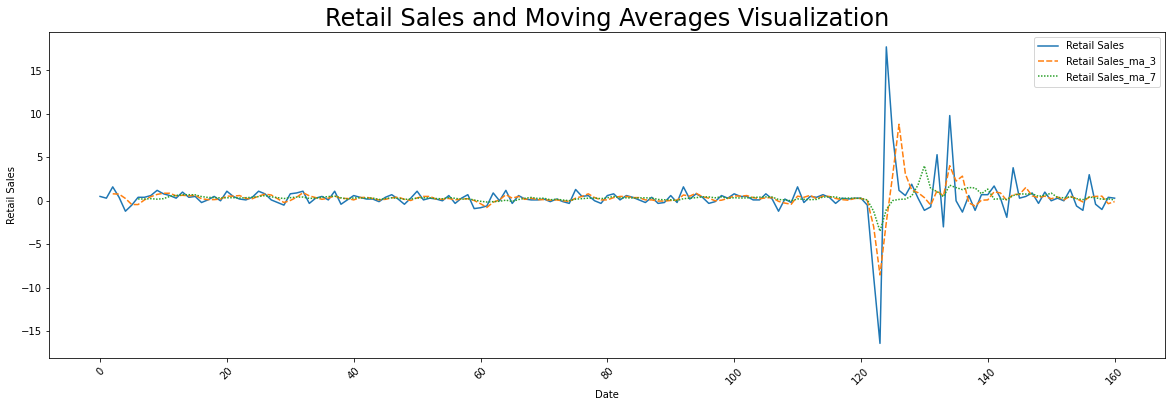

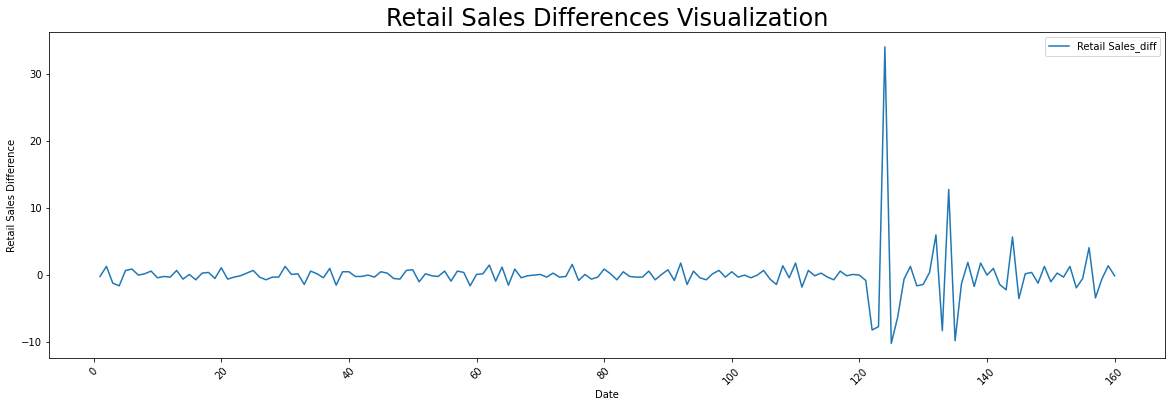

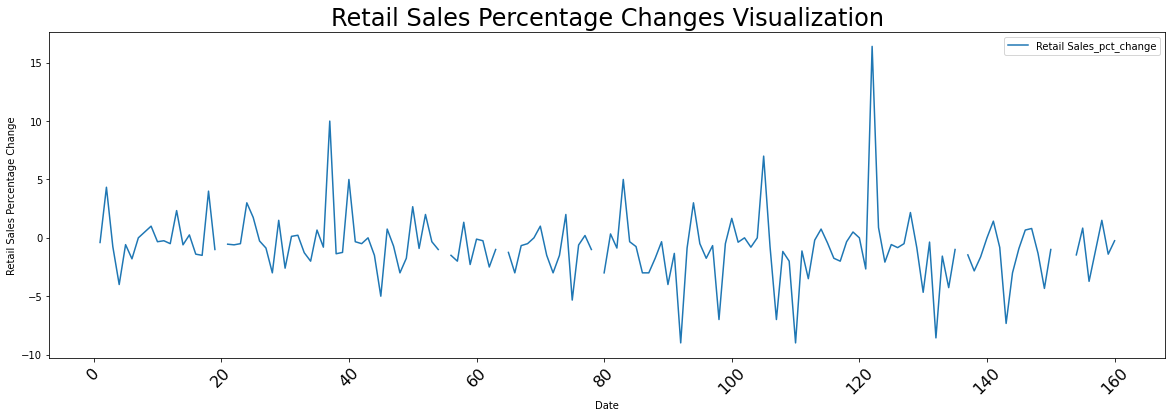

In [28]:
# Feature Engineering
for column in columns_to_analyze:
    # Lagged values
    df[f'{column}_lag_1'] = df[column].shift(1)
    df[f'{column}_lag_2'] = df[column].shift(2)
    
    # Visualize lagged values
    plt.figure(figsize=(20, 6))
    sns.lineplot(data=df[[column, f'{column}_lag_1', f'{column}_lag_2']])
    plt.title(f'{column} and Lagged Values Visualization', fontsize=24)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend([column, f'{column}_lag_1', f'{column}_lag_2'])
    plt.xticks(rotation=45)
    plt.show()
    
    # Moving averages
    df[f'{column}_ma_3'] = df[column].rolling(window=3).mean()
    df[f'{column}_ma_7'] = df[column].rolling(window=7).mean()
    
    # Visualize moving averages
    plt.figure(figsize=(20, 6))
    sns.lineplot(data=df[[column, f'{column}_ma_3', f'{column}_ma_7']])
    plt.title(f'{column} and Moving Averages Visualization', fontsize=24)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend([column, f'{column}_ma_3', f'{column}_ma_7'])
    plt.xticks(rotation=45)
    plt.show()
    
    # Differences
    df[f'{column}_diff'] = df[column].diff()
    
    # Visualize differences
    plt.figure(figsize=(20, 6))
    sns.lineplot(data=df[[f'{column}_diff']])
    plt.title(f'{column} Differences Visualization', fontsize=24)
    plt.xlabel('Date')
    plt.ylabel(f'{column} Difference')
    plt.xticks(rotation=45)
    plt.show()
    
    # Percentage changes
    df[f'{column}_pct_change'] = df[column].pct_change()
    
    # Visualize percentage changes
    plt.figure(figsize=(20, 6))
    sns.lineplot(data=df[[f'{column}_pct_change']])
    plt.title(f'{column} Percentage Changes Visualization', fontsize=24)
    plt.xlabel('Date')
    plt.ylabel(f'{column} Percentage Change')
    plt.xticks(rotation=45, fontsize=16)
    plt.show()

# Model Preprocessing

In [31]:
# Replace infinite or very large values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)


# List of columns to analyze
columns_to_analyze = [
    'ISM Manufacturing PMI', 'ISM Services PMI', 'Housing Starts',
    'Non-Farm Employment Change', 'Unemployment  Rate',
    'Consumer Price Index (CPI)', 'Producer Price Index (PPI)',
    'Retail Sales'
]

# Create target variables
for column in columns_to_analyze:
    df[f'{column}_target'] = np.where(df[column] > 0, 1, 0)

### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

# Train-Test Split
features = [f'{column}_{feat}' for column in columns_to_analyze for feat in ['lag_1', 'lag_2', 'ma_3', 'ma_7', 'diff', 'pct_change']]
target_columns = [f'{column}_target' for column in columns_to_analyze]

X = df[features]
y = df[target_columns]

# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=None, test_size=0.4, random_state=42)

# Model Selection

### Random Forest Classifier

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

models_rf = {}
scaler_rf = StandardScaler()
X_train_scaled_rf = scaler_rf.fit_transform(X_train)
for column in columns_to_analyze:
    y_train_column = y_train[f'{column}_target']
    
    model = RandomForestClassifier()
    model.fit(X_train_scaled_rf, y_train_column)
    
    models_rf[column] = model

### K-Nearest Neighbors (KNN)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

models_knn = {}
scaler_knn = StandardScaler()
X_train_scaled_knn = scaler_knn.fit_transform(X_train)
for column in columns_to_analyze:
    y_train_column = y_train[f'{column}_target']
    
    model = KNeighborsClassifier()
    model.fit(X_train_scaled_knn, y_train_column)
    
    models_knn[column] = model


### Model Evaluation

In [35]:
from sklearn.metrics import classification_report

models = {
    'Random Forest': models_rf,
    'KNN': models_knn
}

for model_name, model_dict in models.items():
    print(f"Evaluating {model_name} model...")
    for column, model in model_dict.items():
        X_test_scaled = None
        if model_name == 'Random Forest':
            X_test_scaled = scaler_rf.transform(X_test)
        elif model_name == 'KNN':
            X_test_scaled = scaler_knn.transform(X_test)
        
        y_test_column = y_test[f'{column}_target']
        y_pred = model.predict(X_test_scaled)
        
        print(f"Results for column: {column}")
        print(classification_report(y_test_column, y_pred))
        print("-" * 30)


Evaluating Random Forest model...
Results for column: ISM Manufacturing PMI
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        50

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

------------------------------
Results for column: ISM Services PMI
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        50

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

------------------------------
Results for column: Housing Starts
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        50

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00   

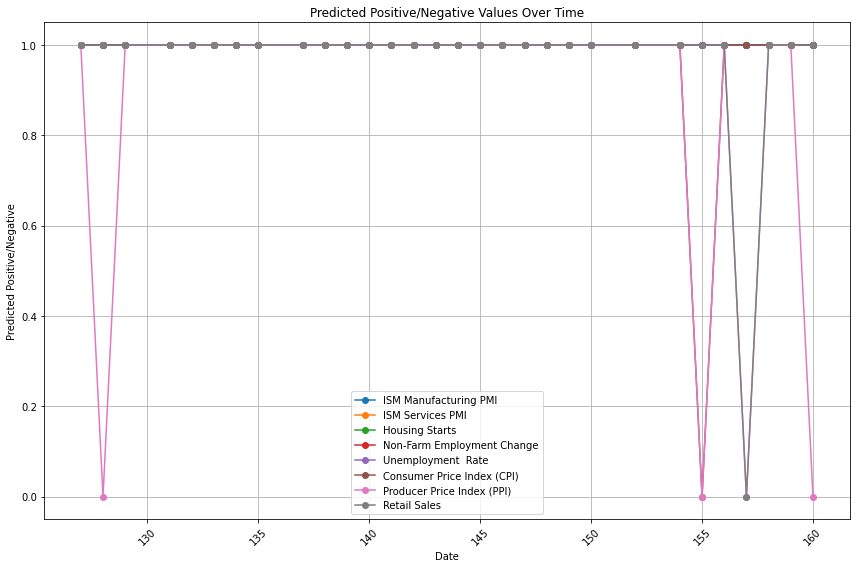

In [36]:
import matplotlib.dates as mdates

look_back_period = 30  # Set the desired look-back period

future_df = df[-look_back_period:]  # Replace with desired look-back period

# Initialize a dictionary to store future predictions
future_predictions = {}

for model_name, model_dict in models.items():
    model_predictions = {}
    
    for column, model in model_dict.items():
        X_future_scaled = None
        if model_name == 'Random Forest':
            X_future_scaled = scaler_rf.transform(future_df[features])
        elif model_name == 'KNN':
            X_future_scaled = scaler_knn.transform(future_df[features])
        
        future_predictions[column] = model.predict(X_future_scaled)

# Convert predictions to DataFrame
future_predictions_df = pd.DataFrame(future_predictions, index=future_df.index)


# Visualize predictions
plt.figure(figsize=(12, 8))
for column in columns_to_analyze:
    plt.plot(future_predictions_df.index, future_predictions_df[column], marker='o', label=column)

plt.xlabel('Date')
plt.ylabel('Predicted Positive/Negative')
plt.title('Predicted Positive/Negative Values Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


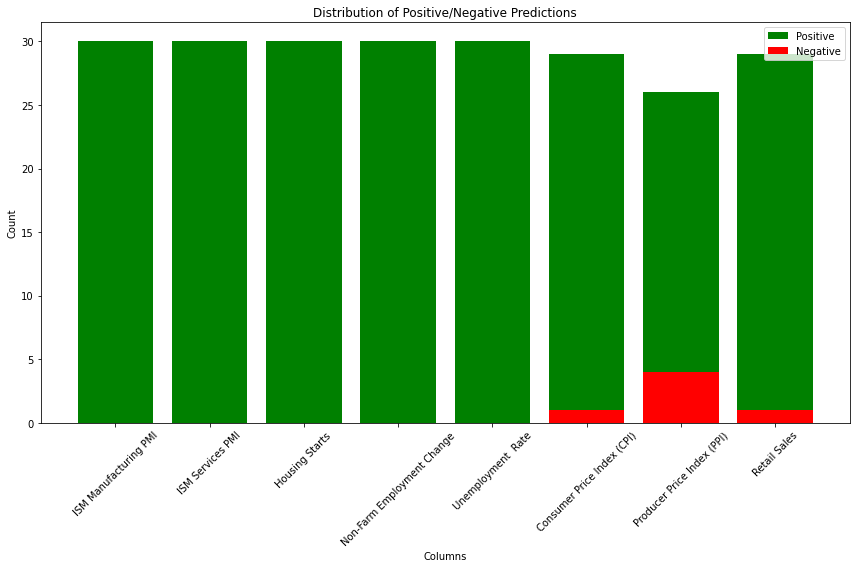

In [37]:
plt.figure(figsize=(12, 8))
positive_counts = future_predictions_df.eq(1).sum()
negative_counts = future_predictions_df.eq(0).sum()

plt.bar(positive_counts.index, positive_counts, label='Positive', color='g')
plt.bar(negative_counts.index, negative_counts, label='Negative', color='r')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.title('Distribution of Positive/Negative Predictions')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


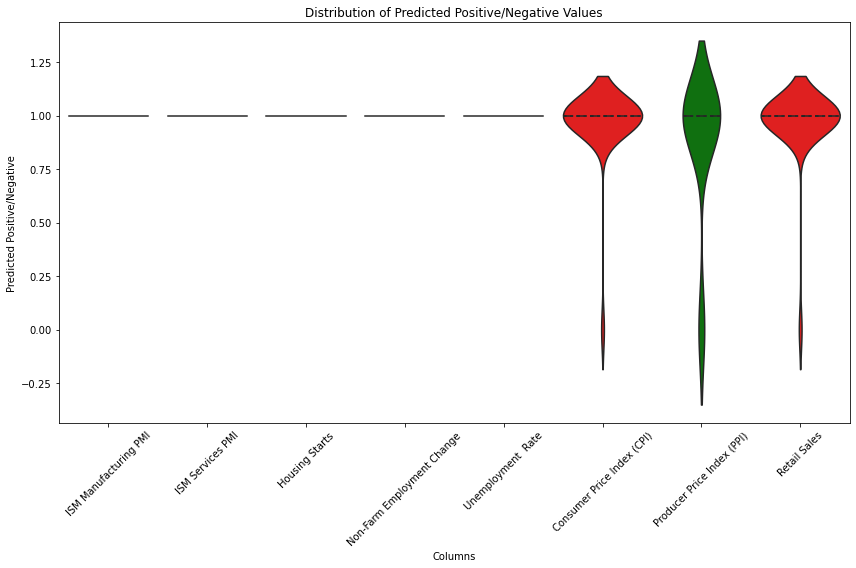

In [38]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=future_predictions_df, inner='quartiles', palette=['g', 'r'])
plt.xlabel('Columns')
plt.ylabel('Predicted Positive/Negative')
plt.title('Distribution of Predicted Positive/Negative Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


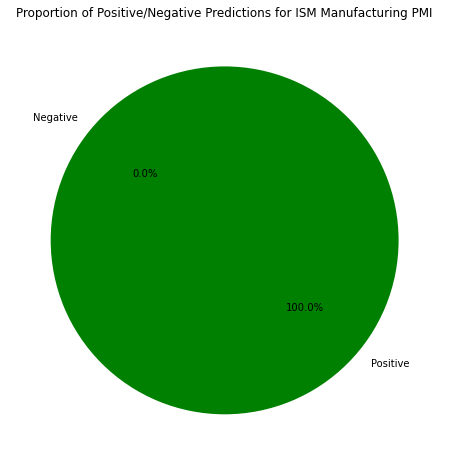

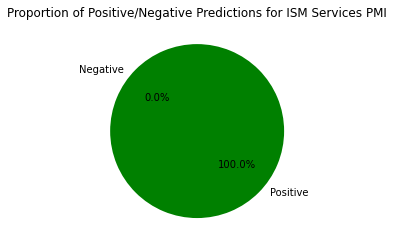

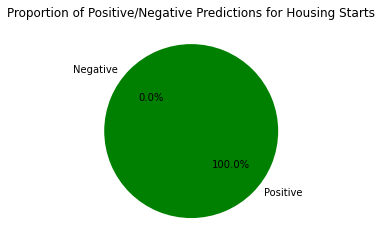

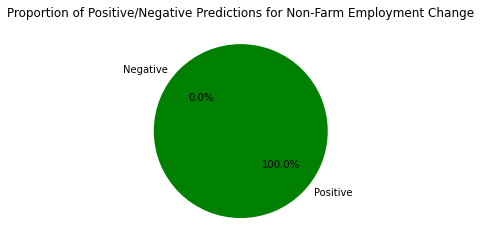

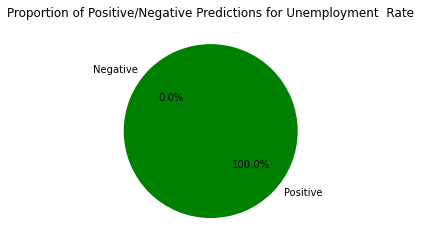

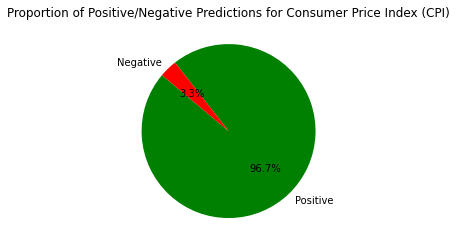

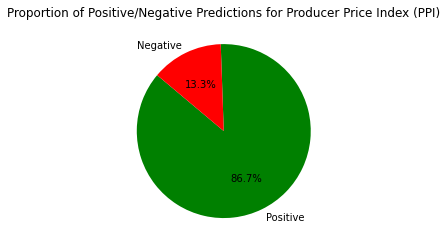

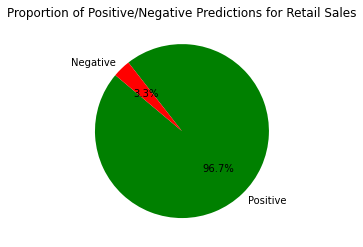

In [39]:
plt.figure(figsize=(10, 8))
for column in columns_to_analyze:
    positive_count = (future_predictions_df[column] == 1).sum()
    negative_count = (future_predictions_df[column] == 0).sum()
    
    # Set colors for positive and negative segments
    colors = ['g', 'r']
    
    plt.pie([positive_count, negative_count], labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'Proportion of Positive/Negative Predictions for {column}')
    plt.show()


In [40]:
import pandas as pd
from fbprophet import Prophet

# List of columns to analyze
columns_to_analyze = [
    'ISM Manufacturing PMI', 'ISM Services PMI', 'Housing Starts',
    'Non-Farm Employment Change', 'Unemployment  Rate',
    'Consumer Price Index (CPI)', 'Producer Price Index (PPI)',
    'Retail Sales'
]

# Train a Prophet model for each column
prophet_models = {}
for column in columns_to_analyze:
    train_data = df[['Date', column]]
    train_data = train_data.rename(columns={'Date': 'ds', column: 'y'})

    model = Prophet()
    model.fit(train_data)
    prophet_models[column] = model

# Predictions for each column on a specific date
for column in columns_to_analyze:
    print(f"Enter a future date (YYYY-MM-DD) for {column}: ")
    future_date = input()
    
    future_df = pd.DataFrame({'ds': [future_date]})
    
    model = prophet_models[column]
    forecast = model.predict(future_df)
    predicted_sentiment = 'Positive' if forecast['yhat'].iloc[0] > 0 else 'Negative'
    
    print(f"Predicted sentiment for {column} on {future_date}: {predicted_sentiment}")
    print("-" * 30)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

Enter a future date (YYYY-MM-DD) for ISM Manufacturing PMI: 
2023-09-04
Predicted sentiment for ISM Manufacturing PMI on 2023-09-04: Positive
------------------------------
Enter a future date (YYYY-MM-DD) for ISM Services PMI: 
2023-08-06
Predicted sentiment for ISM Services PMI on 2023-08-06: Positive
------------------------------
Enter a future date (YYYY-MM-DD) for Housing Starts: 
2023-08-01
Predicted sentiment for Housing Starts on 2023-08-01: Positive
------------------------------
Enter a future date (YYYY-MM-DD) for Non-Farm Employment Change: 
2023-08-01
Predicted sentiment for Non-Farm Employment Change on 2023-08-01: Positive
------------------------------
Enter a future date (YYYY-MM-DD) for Unemployment  Rate: 
2023-08-01
Predicted sentiment for Unemployment  Rate on 2023-08-01: Positive
------------------------------
Enter a future date (YYYY-MM-DD) for Consumer Price Index (CPI): 
2023-08-01
Predicted sentiment for Consumer Price Index (CPI) on 2023-08-01: Positive
---

- This here was a test of entering a random date of when the news will take place and the prediction outputing whether the news will be negative or positive on that day.

# Limitations & Next Steps

The models have limitations, including the potential influence of external factors not captured in the dataset and the need for real-time data integration. Future steps may involve improving model accuracy by incorporating real-time data, refining feature engineering techniques, and building an interactive platform to provide real-time sentiment predictions for traders.

# Observations & Conclusions

This project seamlessly combines machine learning and time series forecasting to predict the sentiment of Forex news articles. By integrating these two approaches, it offers comprehensive insights into the influence of economic indicators and events on the foreign exchange market. These insights empower traders with valuable information to make informed decisions and devise effective trading strategies.

